# Описание проекта

## **Задача**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1. выделить целевые группы клиентов;
2. предложить меры по снижению оттока;
3. определить другие особенности взаимодействия с клиентами.

## Ход выполнения проекта

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gym_churn.csv')

In [4]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [5]:
# посмотрим датасет
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


В датасете 14 столбцов и 4000 строк. 10 столбцов с целочисленными значениями (int), 4 с вещественными (float). Пропусков не наблюдается. 

Приведем наименования столбцов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()

### Шаг 2. Проведите исследовательский анализ данных (EDA)

#### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [7]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрим на каждую колонку внимательнее.

In [8]:
df['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

In [9]:
df['gender'].describe()

count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

Столбец "gender". Мужчин и женщин представлено почти поровну. Предположим что мужчин - 2041. Стандартное отклонение - 0,49. 

In [10]:
df['near_location'].describe()

count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: near_location, dtype: float64

Столбец "near_location". 84% посетителей проживает рядом с фитнес-центром. Стандартное отклонение - 0,36.

In [11]:
df['partner'].describe()

count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

Почти половина посетителей (48,7%) являются сотрудниками компании-партнера клуба. Стандартное отклонение - 0,5.

In [12]:
df['promo_friends'].describe()

count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: promo_friends, dtype: float64

30% посетителей пришли по приглашению знакомых по промо-коду. Стандартное отклонение - 0,46.

In [13]:
df['phone'].describe()

count    4000.000000
mean        0.903500
std         0.295313
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone, dtype: float64

У 90% процентов посетителей указан контактный телефон. Стандартное отклонение - 0,29.

In [14]:
df['contract_period'].describe()

count    4000.000000
mean        4.681250
std         4.549706
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: contract_period, dtype: float64

In [15]:
df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

Максимальная длительность текущего действующего абонемента - 12 месяцев. Минимальная - 1 месяц. Среднее значение - 4,6 месяца, но медиана - 1 месяц. Большая часть абонементов заключена на 1 месяц - 2207 штук, на 6 месяцев - 833 штуки, на год - 960 штук. Стандартное отклонение - 4,5. 

In [16]:
df['group_visits'].describe()

count    4000.000000
mean        0.412250
std         0.492301
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: group_visits, dtype: float64

41% посещает групповые занятия. Стандартное отклонение - 0,49.

In [17]:
df['age'].describe()

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64

Средний возраст посетителей - 29 лет, минимальный - 18 лет, максимальный - 41. Медиана 29 лет, а стандартное отклонение - 3,25, это может значить, что скорее всего данные распределены нормально.

In [18]:
df['avg_additional_charges_total'].describe()

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64

Средняя суммарная выручка от других услуг фитнес-центра - 146,9 у.е. Максимальная 552,6 у.е. Стандартное отклонение - 96,3.

In [19]:
df['month_to_end_contract'].describe()

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

In [20]:
df['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

Максимальный срок до окончания текущего действующего абонемента - 12 месяцев, таких абонементов - 524 штуки. Минимальный срок - 1 месяц, таких большинство - 2207 штуки. Среднее значение - 4,3 месяца. Стандартное отклонение - 4,19.

In [21]:
df['lifetime'].describe()

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64

Максимальное время с момента первого обращения в фитнес-центр - 31 месяц. Среднее время - 3,7 месяца, медианное - 3 месяца. Большинство посетителей занимается около 3х месяцев. Стандартное отклонение - 3,74.

In [22]:
df['avg_class_frequency_total'].describe()

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: avg_class_frequency_total, dtype: float64

Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза, медианное значение практически совпадает со средним. Максимальная частота посещений - 6 раз в неделю. Стандартное отклонение - 0,9.

In [23]:
df['avg_class_frequency_current_month'].describe()

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

Средняя частота посещений в неделю за предыдущий месяц - 2 раза, медианное значение практически совпадает со средним. Максимальная частота посещений - 6 раз в неделю. Стандартное отклонение - 1,05.

In [24]:
df['churn'].describe()

count    4000.000000
mean        0.265250
std         0.441521
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64

В этом месяце 26% посетителей перестали посещать фитнес-центр. Стандратное отклонение - 0,44.

Общий вывод:

- Столбец "gender". Мужчин и женщин представлено почти поровну. Предположим что мужчин - 2041. Стандартное отклонение - 0,49. 
- Столбец "near_location". 84% посетителей проживает рядом с фитнес-центром. Стандартное отклонение - 0,36.
- Почти половина посетителей (48,7%) являются сотрудниками компании-партнера клуба. Стандартное отклонение - 0,5.
- 30% посетителей пришли по приглашению знакомых по промо-коду. Стандартное отклонение - 0,46.
- У 90% процентов посетителей указан контактный телефон. Стандартное отклонение - 0,29.
- Максимальная длительность текущего действующего абонемента - 12 месяцев. Минимальная - 1 месяц. Среднее значение - 4,6 месяца, но медиана - 1 месяц. Большая часть абонементов заключена на 1 месяц - 2207 штук, на 6 месяцев - 833 штуки, на год - 960 штук. Стандартное отклонение - 4,5. 
- Средний возраст посетителей - 29 лет, минимальный - 18 лет, максимальный - 41. Медиана 29 лет, а стандартное отклонение - 3,25, это может значить, что скорее всего данные распределены нормально.
- Средняя суммарная выручка от других услуг фитнес-центра - 146,9 у.е. Максимальная 552,6 у.е. Стандартное отклонение - 96,3.
- Максимальный срок до окончания текущего действующего абонемента - 12 месяцев, таких абонементов - 524 штуки. Минимальный срок - 1 месяц, таких большинство - 2207 штуки. Среднее значение - 4,3 месяца. Стандартное отклонение - 4,19.
- Максимальное время с момента первого обращения в фитнес-центр - 31 месяц. Среднее время - 3,7 месяца, медианное - 3 месяца. Большинство посетителей занимается около 3х месяцев. Стандартное отклонение - 3,74.
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза, медианное значение практически совпадает со средним. Максимальная частота посещений - 6 раз в неделю. Стандартное отклонение - 0,9.
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза, медианное значение практически совпадает со средним. Максимальная частота посещений - 6 раз в неделю. Стандартное отклонение - 1,05.
- В этом месяце 26% посетителей перестали посещать фитнес-центр. Стандратное отклонение - 0,44.

####  Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [25]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Всего ушло в отток - 1061 посетителей, продолжает посещать фитнес - 2939 человек.

In [26]:
df.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- Распределение мужчин и женщин, среди тех кто ушел и остался, одинаковое.
- Ожидаемо, что среди тех кто перестал посещать спорт-зал проживающих рядом с фитнесом, меньше чем среди продолжающи посещать (76% против 87%).
- Интересно, что клиенты пришедшие по партнерской программе или по промо-коду друзей чаще продолжают заниматься (35%/18% ушедших против 53%/35% против оставшихся).
- Наличие контактного телефона одинаковое среди обеих групп (90%).
- Среди тех кто продолжает заниматься - средняя длительность текущего действующего абонемента - 5,7 месяцев. Среди оттока - дительность абонемента 1,7 месяца.
- Групповые занятия реже посещают те кто ушел (27%), среди оставшихся почти половина посещает групповые заниятия.
- Средний возраст попавших в отток - 27 лет, в среди занимающихся - 30 лет.
- В среднем на доп.услуги больше тратят не попавшие в отток, 158 у.е. против 115 у.е.
- Срок до окончания текущего действующего абонемента больше у не попавших в отток - 5,3 месяца, против 1,6 месяца в оттоке.
- "Старожилов" фитнес-центра больше среди продолжающих заниматься, 4,7 месяца. Уходят чаще прозанимавшись около месяца.
- Средняя частота посещений среди тех кто остался - 2 раза в неделю, а среди тех кто в оттоке - 1 раз в неделю.

#### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

Создадим отдельные таблицы для оттока и не попавших в отток.

In [27]:
df_1 = df[df['churn'] == 1] # отток
df_1 = df_1.drop('churn', axis=1)

In [28]:
df_0 = df[df['churn'] == 0] # не отток
df_0 = df_0.drop('churn', axis=1)

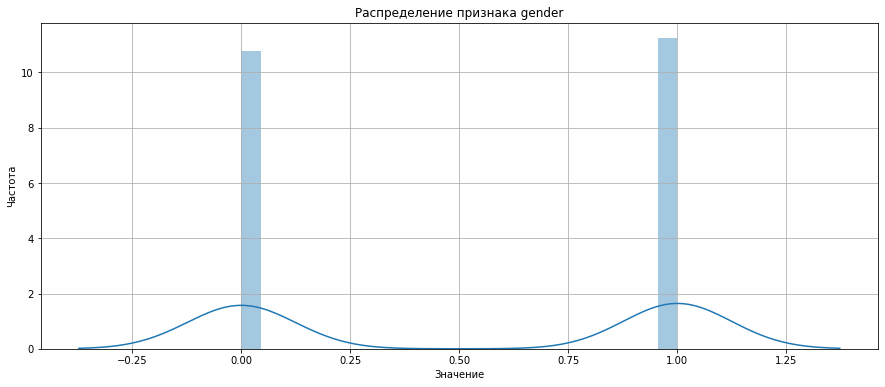

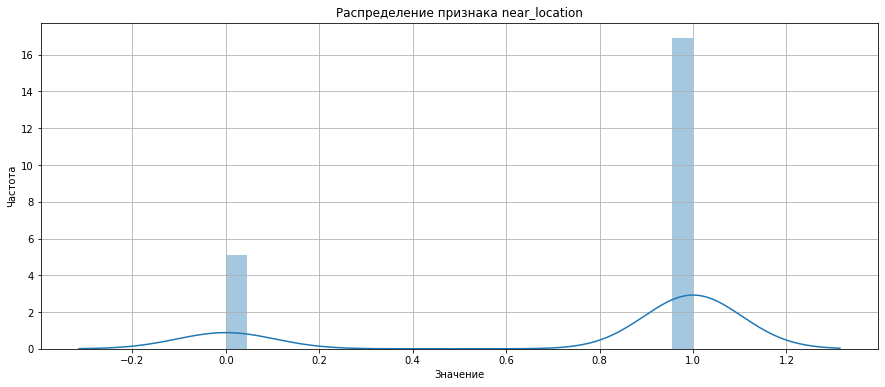

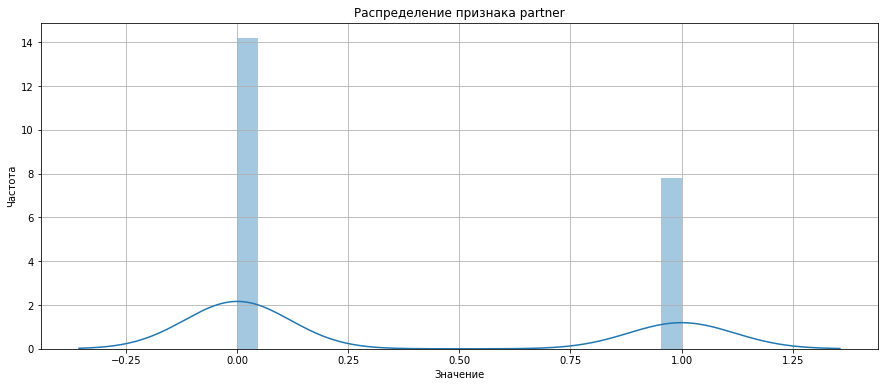

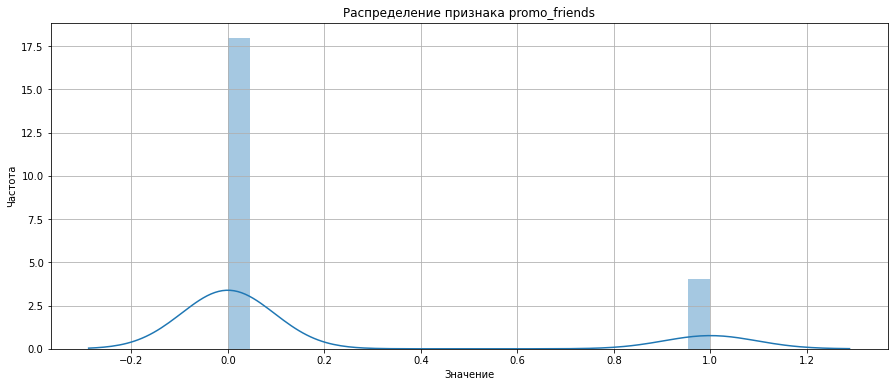

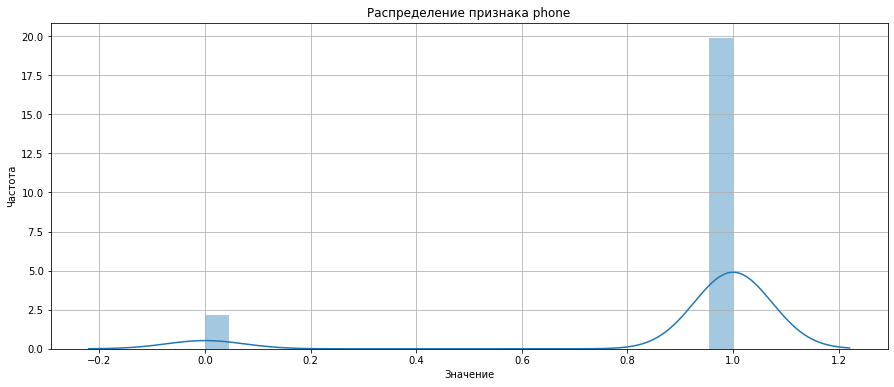

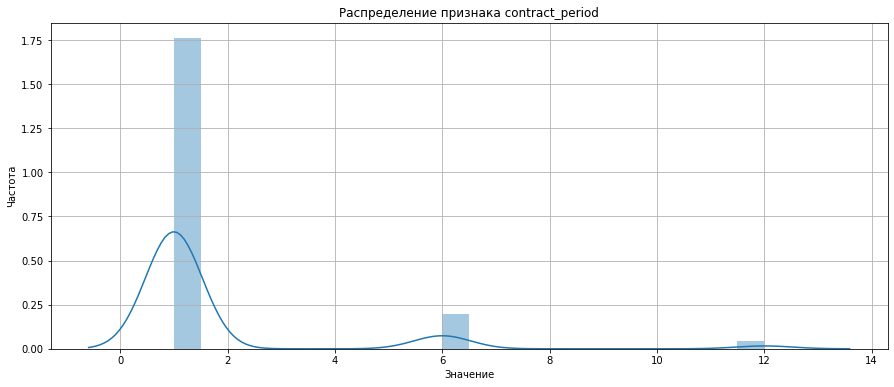

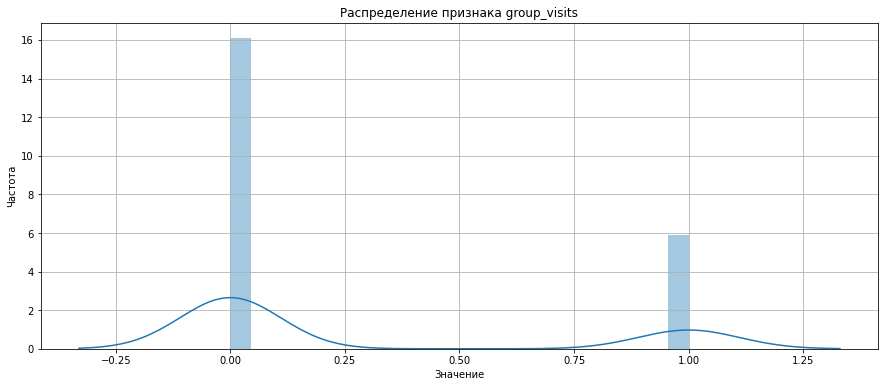

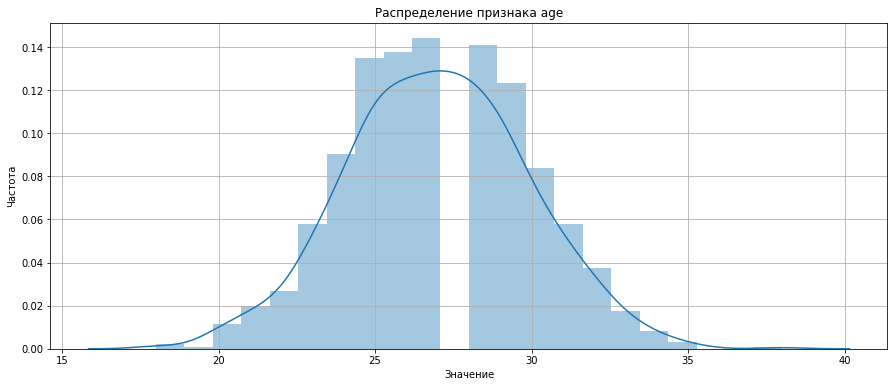

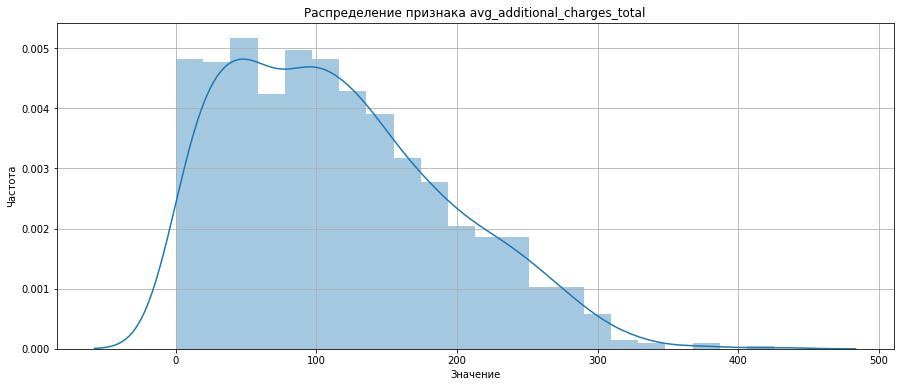

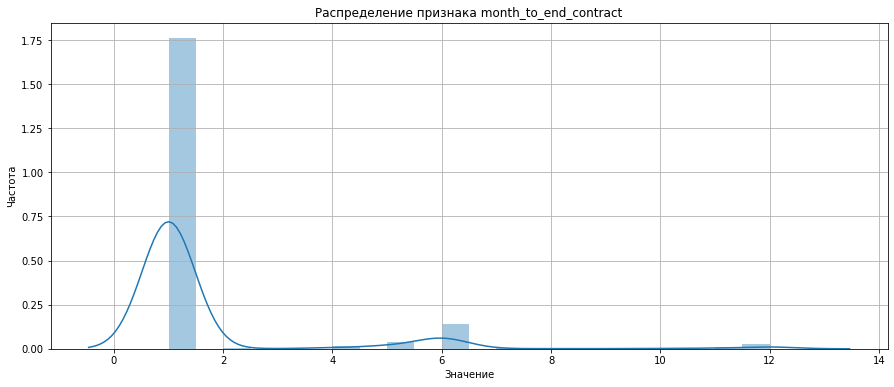

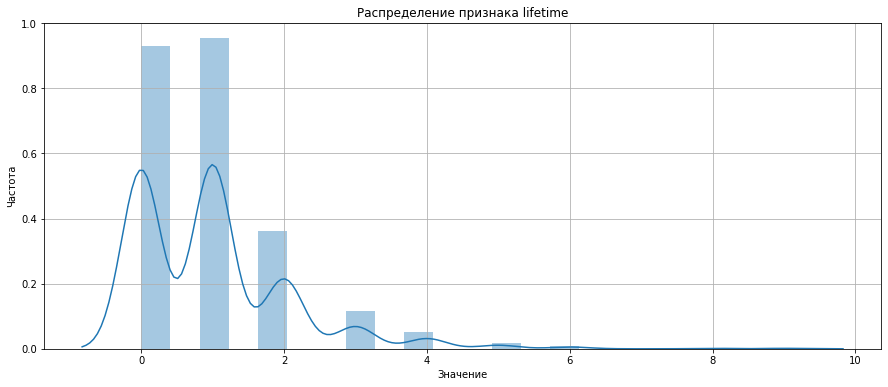

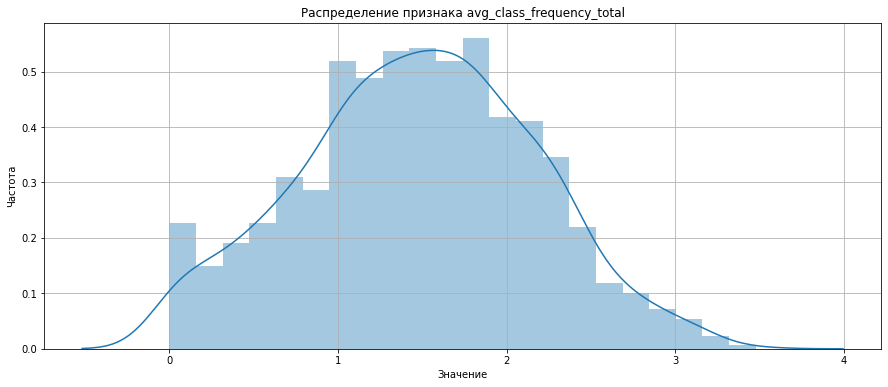

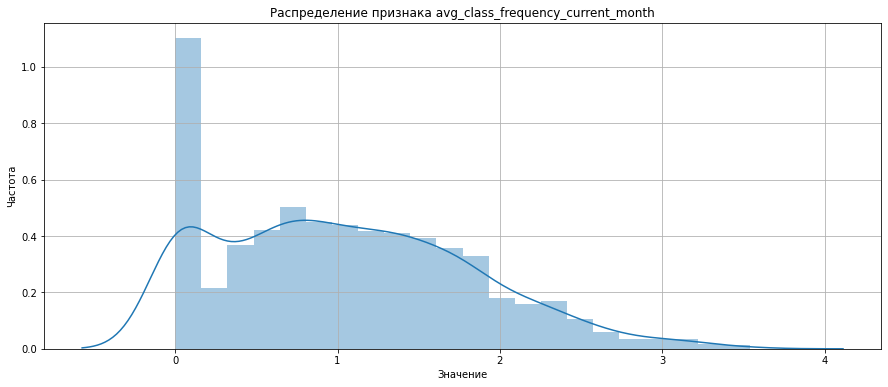

In [29]:
for col in df_1.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df_1[col], bins=22, )
    plt.title('Распределение признака {}'.format(col))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid() 
    plt.show()  

Выводы на основании графиков ушедших в отток:

- Мужчины и женщины распределены примерно поровну.
- У подавляющего большинства ушедших фитнес находился рядом с домом или работой (80%).
- Только лишь 30% попавших в отток пришли по партнерской программе.
- По промо-коду от знакомых пришла меньшая часть оттока, около 20%.
- Практически у всех указан контактный телефон.
- Среди оттока длительность текущего абонемента у большинства - 1 месяц.
- Ушедшие клиенты значительно реже посещали групповые занятия.
- Возраст распределен нормально, без выбросов.
- Распределение дополнительных трат смещено влево.
- У большинства (90%) переставших посещать финтес оставался 1 месяц до конца абонемента.
- Большинства ушедших первый раз обратились в фитнес меньше месяца назад.
- Распределение признака "средняя частота посещений в неделю за все время с начала действия абонемента" - нормальное. Но есть выброс слева, достаточно большое количество вообще не посещало фитнес.
- Распределение признака "средняя частота посещений в неделю за предыдущий месяц" тоже нормальное, с таким же выбросом.

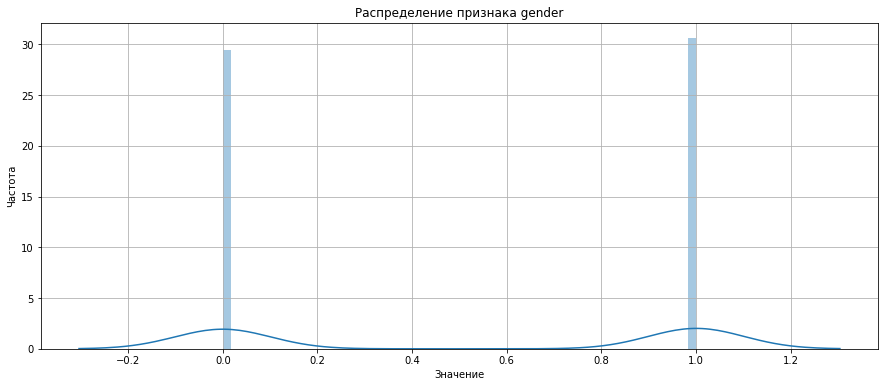

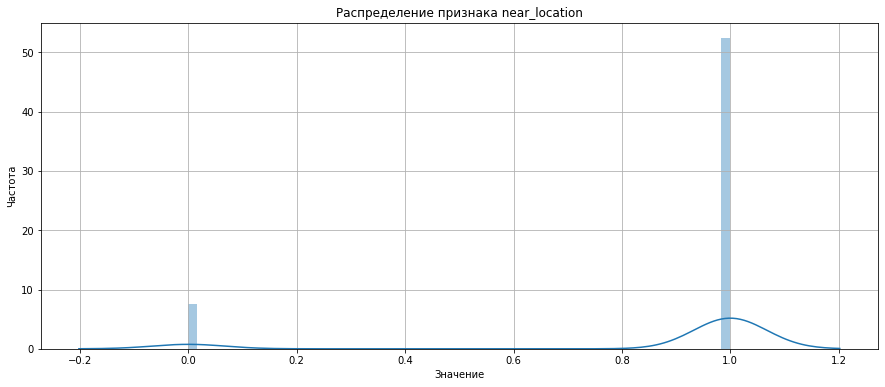

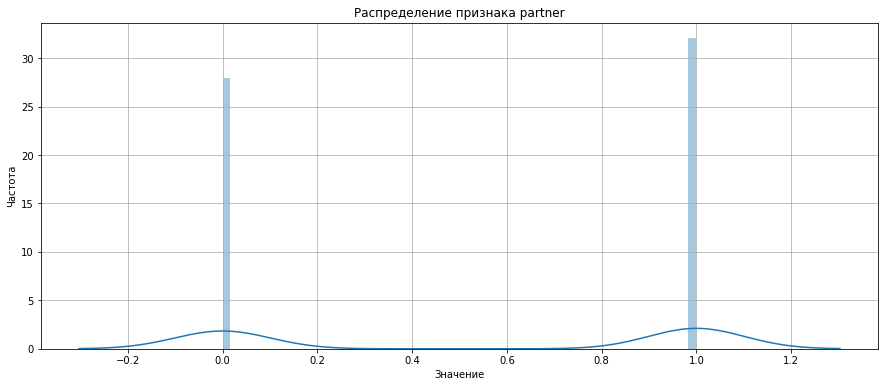

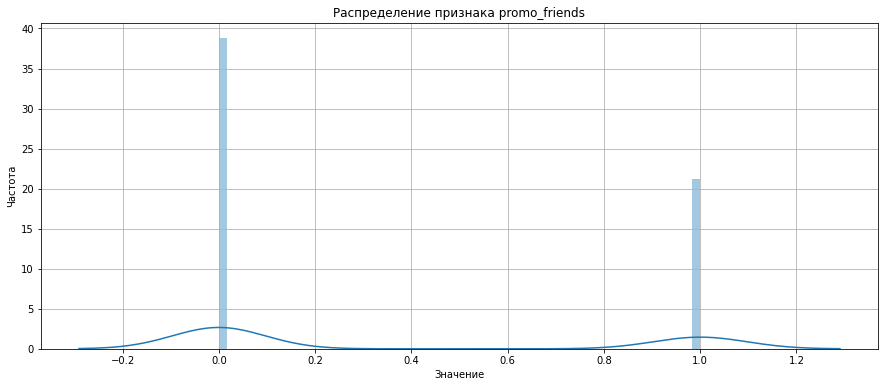

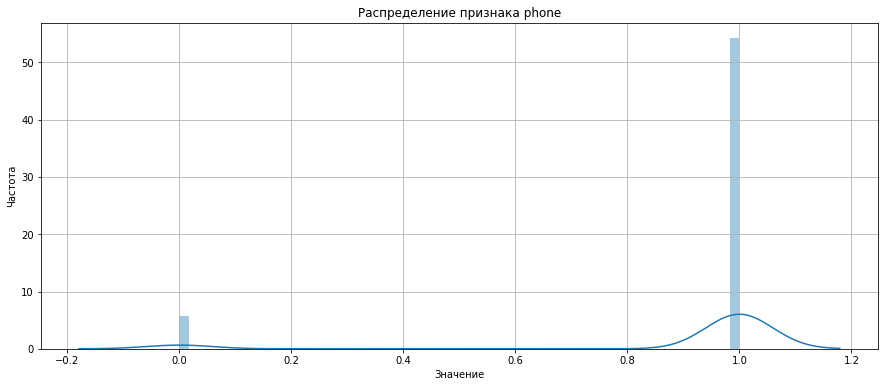

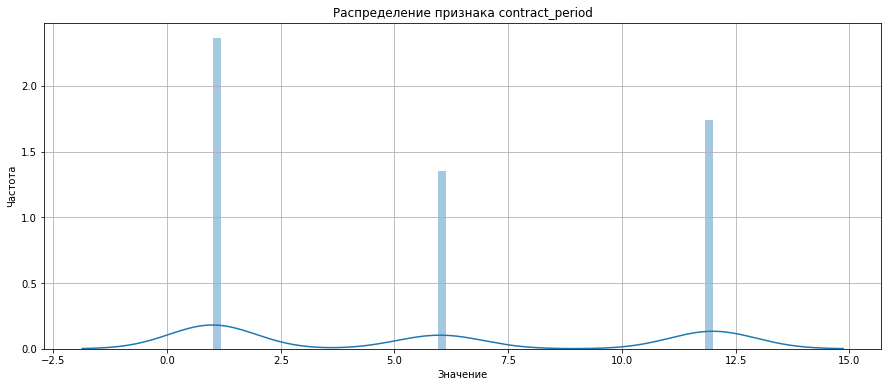

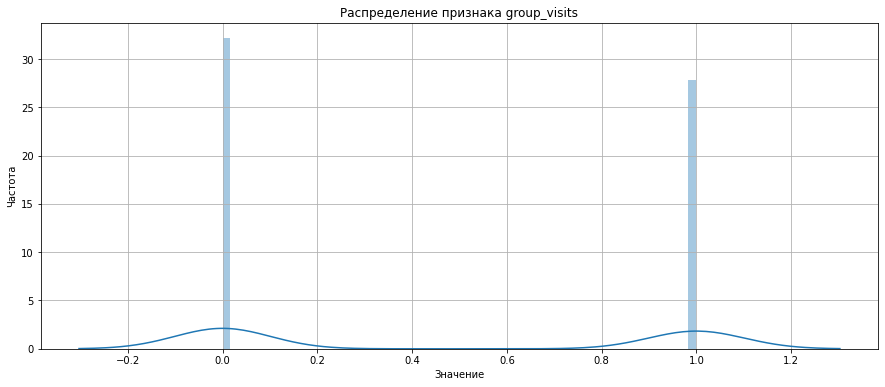

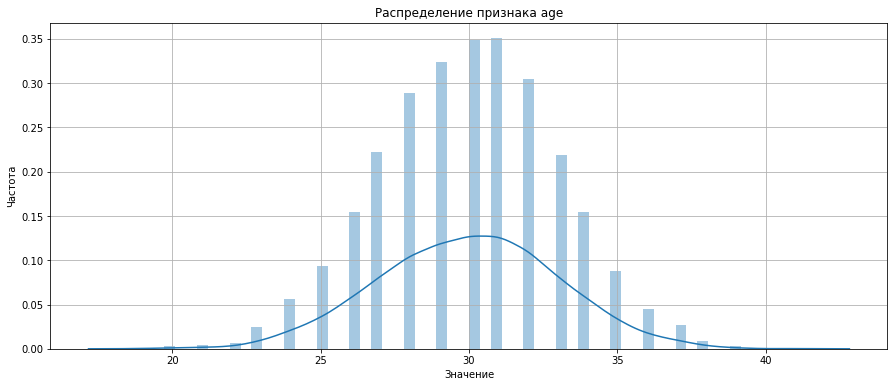

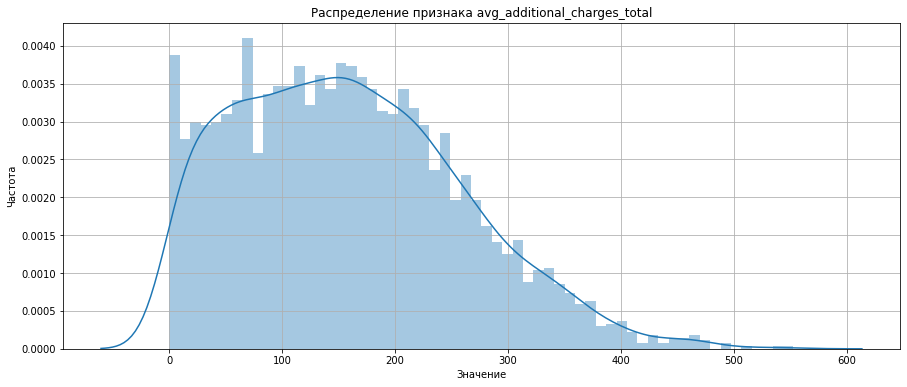

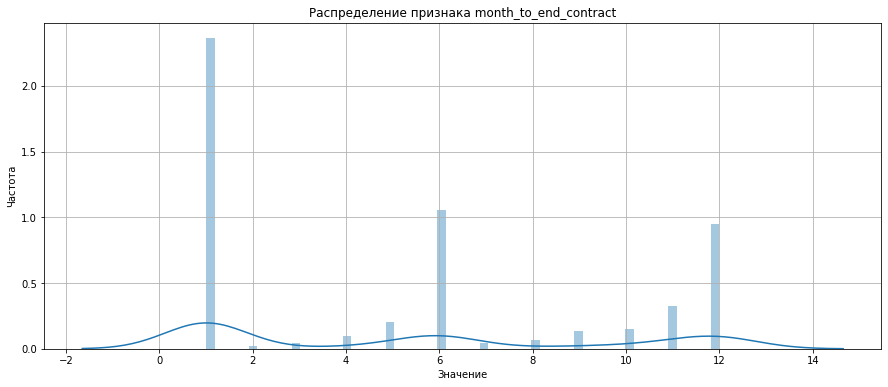

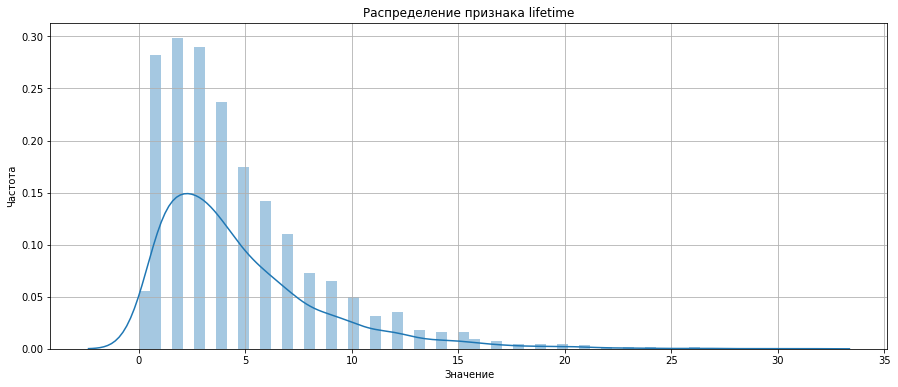

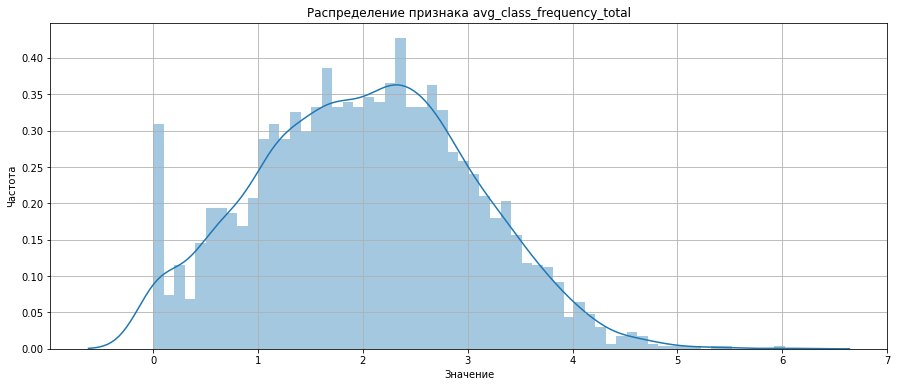

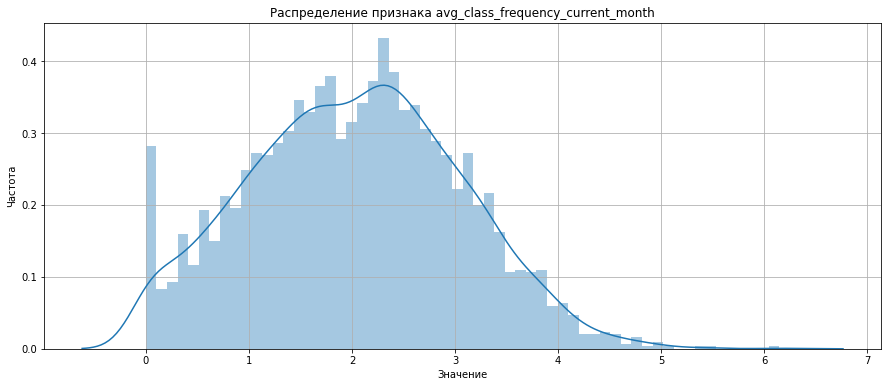

In [30]:
for col in df_0.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df_0[col], bins=60, )
    plt.title('Распределение признака {}'.format(col))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid() 
    plt.show()  

Выводы на основании графиков не попавших в отток:

- Мужчины и женщины распределены примерно поровну.
- 90% посещающих фитнес живут или работают рядом.
- Среди продолжающих посещать фитнес чуть больше половины пришли по партнерской программе.
- По промо-коду от знакомых пришла одна третья часть посещающих фитнес.
- Практически у всех указан контактный телефон.
- Длительность текущего абонемента у продолжающих ходить в фитнес-центр: 1 месяц, примерно 40%; 6 месяцев, примерно 25%, 12 месяцев, примерно 30% .
- Групповые занятия посещают примерно 45% от всех кто ходит на фитнес.
- Возраст распределен нормально, без выбросов.
- Распределение дополнительных трат смещено влево.
- Срок до окончания текущего действующего абонемента у продолжающих посещать фитнес - 1 месяц - 43%, 6 месяцев - 18%, 12 месяцев - 16%.
- Большинства продолжающих посещать фитнес ходят туда от 1 до 4 месяцев.
- Распределение признака "средняя частота посещений в неделю за все время с начала действия абонемента" - нормальное. Но есть выброс слева, достаточно большое количество вообще не посещало фитнес. Многие ходят от 1 до 3 раз в неделю.
- Распределение признака "средняя частота посещений в неделю за предыдущий месяц" тоже нормальное, с таким же выбросом. Многие ходят от 1 до 3 раз в неделю.

#### Постройте матрицу корреляций и отобразите её.

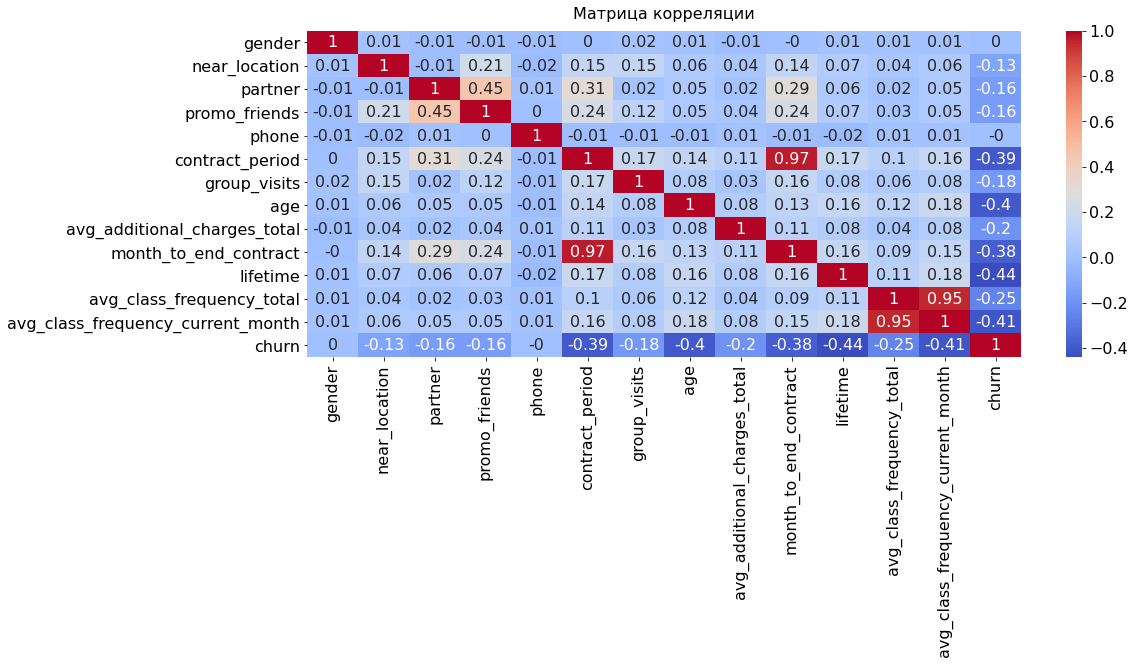

In [31]:
plt.figure(figsize=(16, 6))
plt.rcParams['font.size'] = '16'
heatmap = sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', )
heatmap.set_title('Матрица корреляции', fontdict={'fontsize':16}, pad=12);

Матрицы корреляции наглядно отображает высокую корреляцию (0,97) между длительностью текущего действующего абонемента (contract_period) и сроком до окончания текущего действующего абонемента (month_to_end_contract).  

Высокая корреляция (0,95) наблюдается между средней частотой посещений в неделю за все время с начала действия абонемента и средней частота посещений в неделю за предыдущий месяц. 

Средняя корреляция (0,45) есть между фактом первоначальной записи в рамках акции «приведи друга» и сотрудничеством с компаниями, чьи сотрудники могут получать скидки на абонемент.

Так как нам нужно будет использовать модель на линейной регрессии, то уберем мультиколлинеарность.

In [32]:
df = df.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

### Шаг 3. Постройте модель прогнозирования оттока клиентов

#### Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

In [33]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# зададим список моделей
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [35]:
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test
    )

LogisticRegression(random_state=0)
Accuracy:0.88 Precision:0.75 Recall:0.74
RandomForestClassifier(random_state=0)
Accuracy:0.90 Precision:0.80 Recall:0.77


Метрики модели обученной алгоритмом RandomForestClassifier немного лучше, чем у модели с LogisticRegression.

### Шаг 4. Сделайте кластеризацию клиентов
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):



#### Стандартизируйте данные.


In [36]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method='ward') 

#### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.


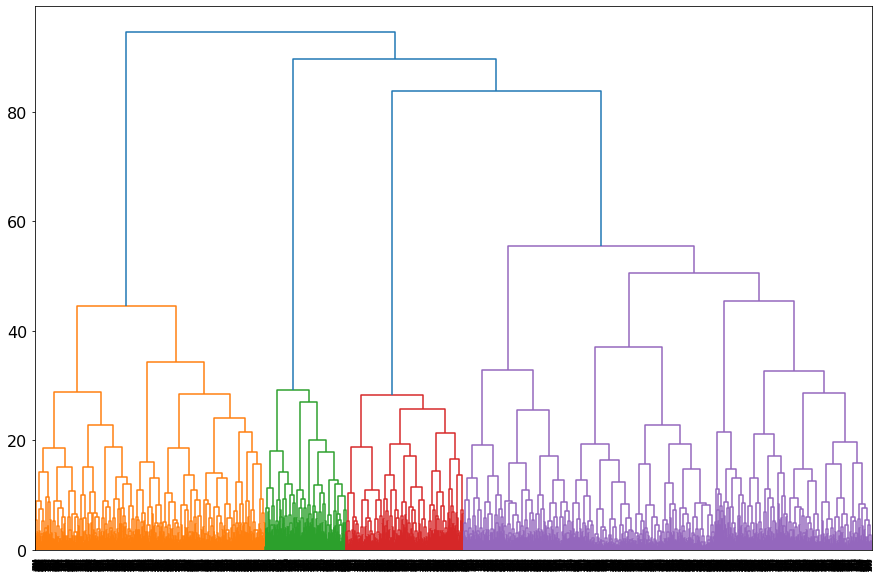

In [37]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании полученного графика можно выделить 4 кластера.

#### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).


In [38]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результатов
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

#### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?


In [39]:
# сохраним метки кластера в поле датасета
df['cluster_km'] = labels

# выведим статистику по средним значениям признаков по кластеру
df.groupby('cluster_km').agg('mean')

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


Сравнивая средние значения признаков кластеров можно отметить, что:
- В кластер 0 попали клиенты которые проживают рядом с фитнес-центром, являются сотрудниками компаний-партнеров, пришли по приомо-коду, у них ло окончания абонемента в среднем 6 месяцев, посещают спортзал в среднем 4 месяца по 2 раза в неделю, отток не большой, 13%.
- В кластер 1 попали клиенты которые живут далеко, половина из них сотрудники компаний-партнеров, малая часть из них посещают групповые занятия, более 40% в оттоке.
- Кластер 2 выделяется высоким средним ценником на доп.услуги, максимальным среди всех клиентом временем первого обращения и самым низким оттоком, 1%.
- Кластер 3 можно выделить самым высоким оттоком - 50% и минимальным среди остальных сроком до окончания текущего действующего абонемента - 1,5 месяца.
- 4й кластер содержит в себе клиентов, которые не указали телефон.

#### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?


In [40]:
columns = df.drop(columns=['cluster_km']).columns.tolist()
def create_cluster_hist(df, columns):
    for i in columns:
        print("Признак {}".format(i))
        for j in sorted(df['cluster_km'].unique()):
            df_cluster = df[df['cluster_km'] == j]
            plt.figure(figsize =(15, 5))
            sns.distplot(df_cluster[i])
            plt.ylabel('Частота')
            plt.xlabel('Кластер №'+ str(j))
            plt.title(i)
            plt.grid()
            plt.show()

Признак gender


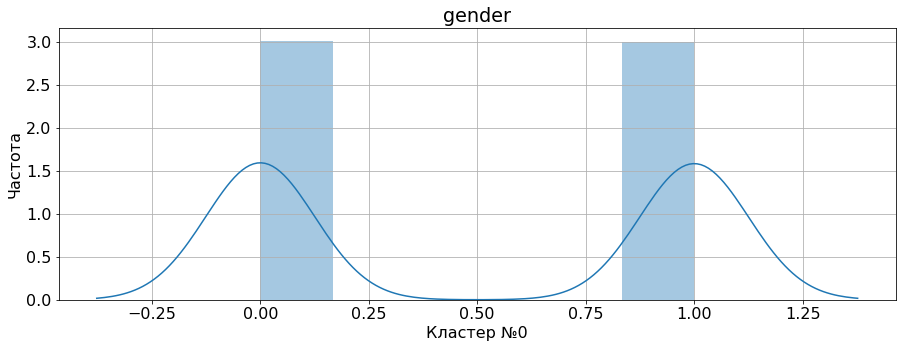

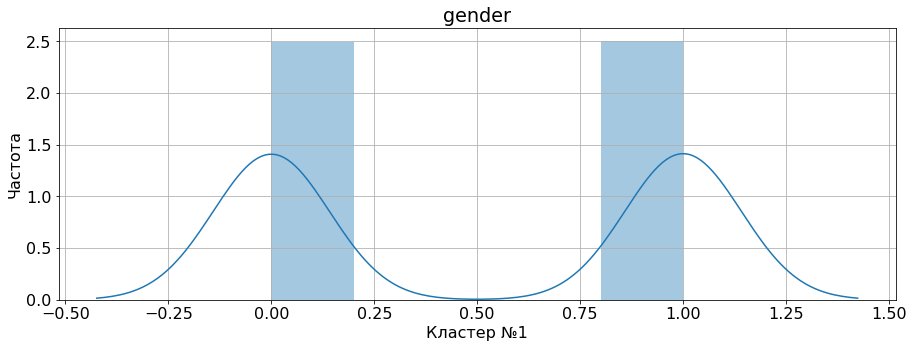

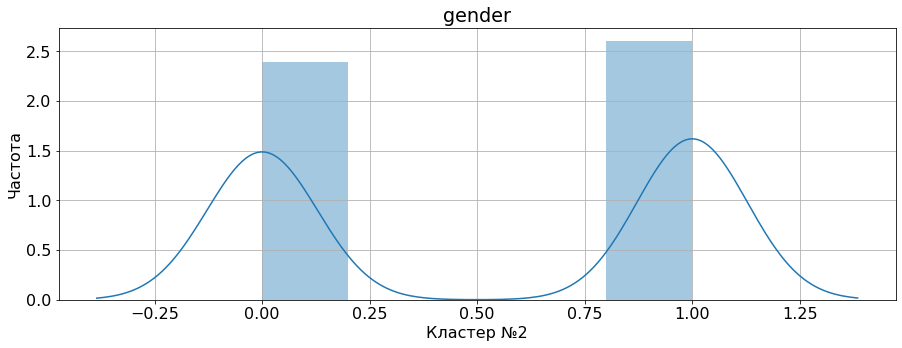

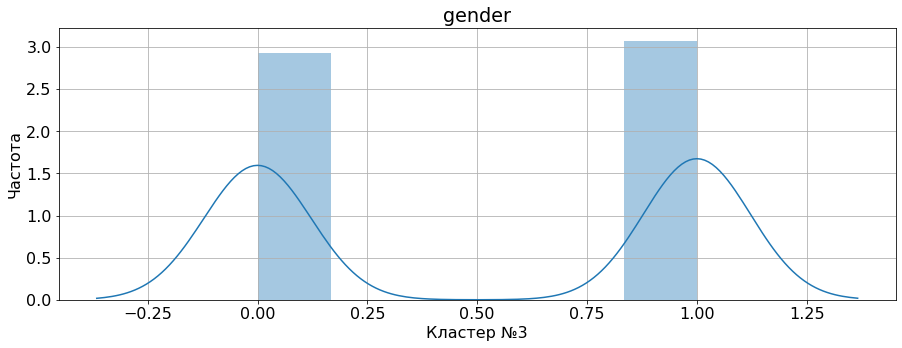

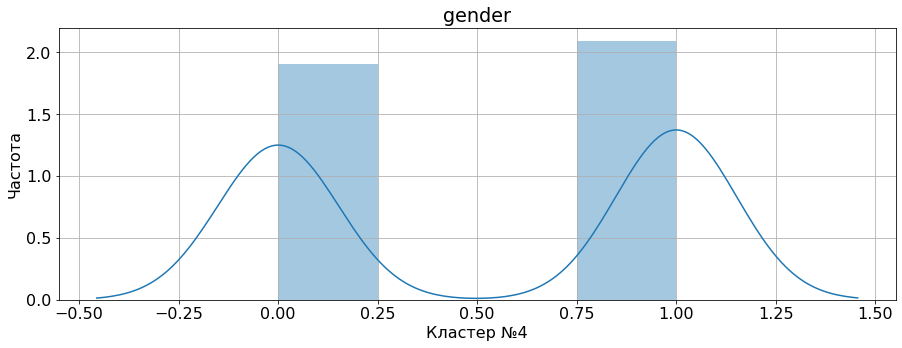

Признак near_location


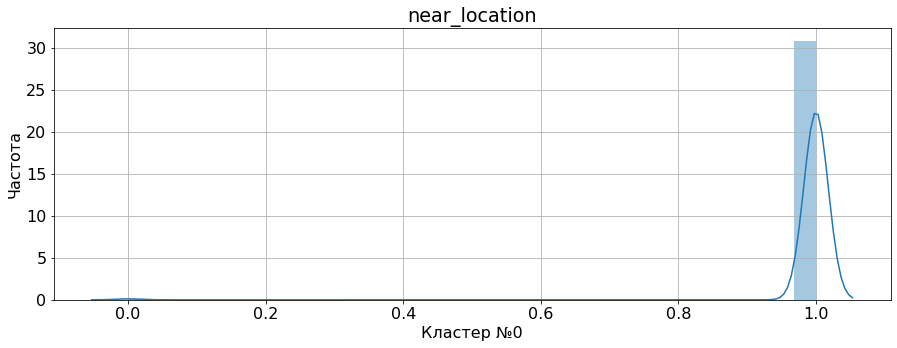

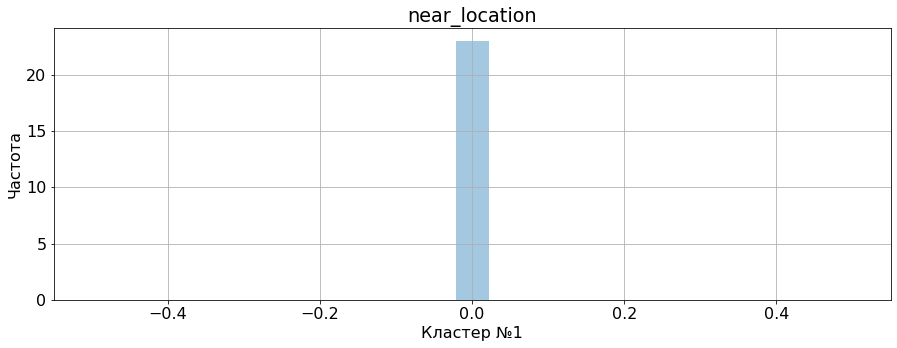

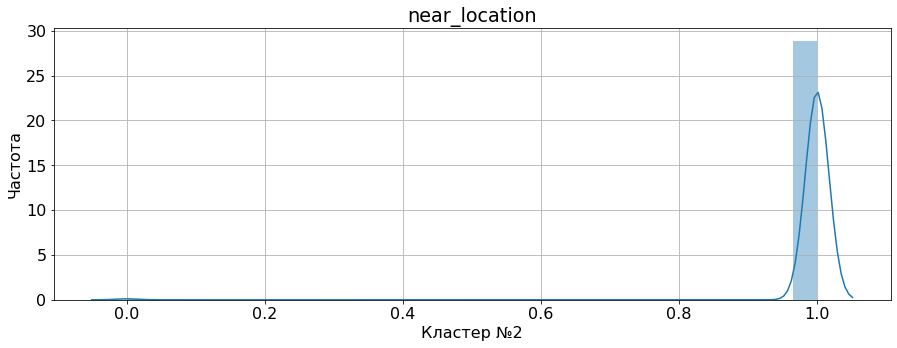

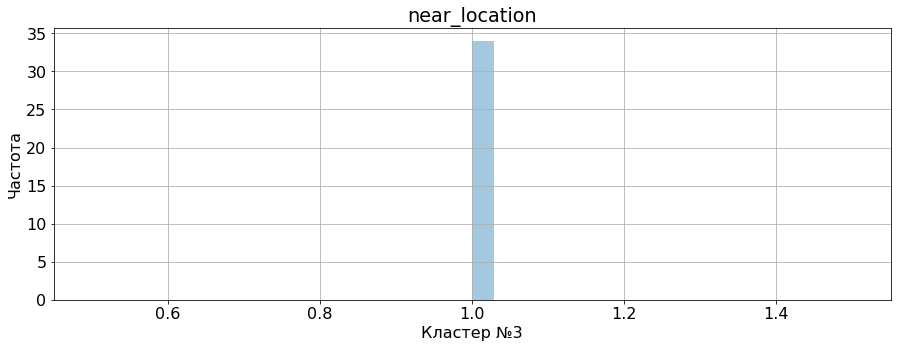

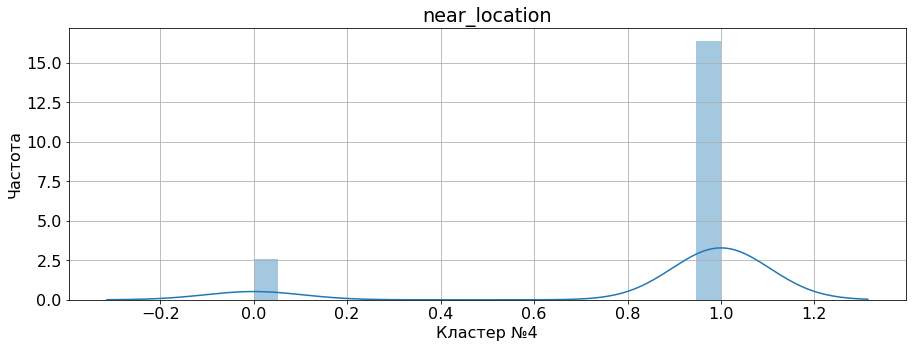

Признак partner


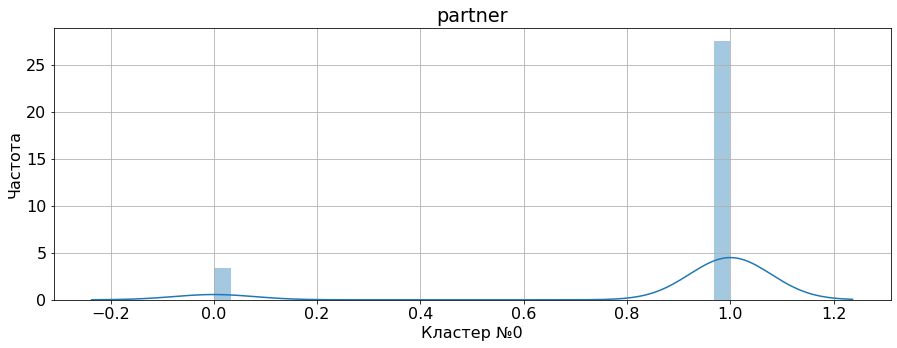

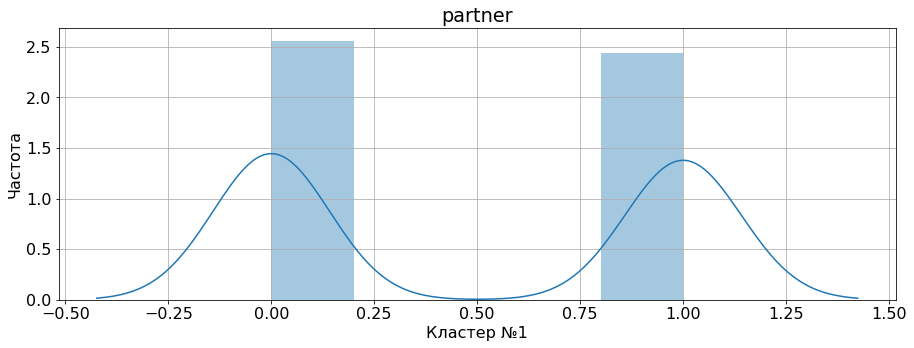

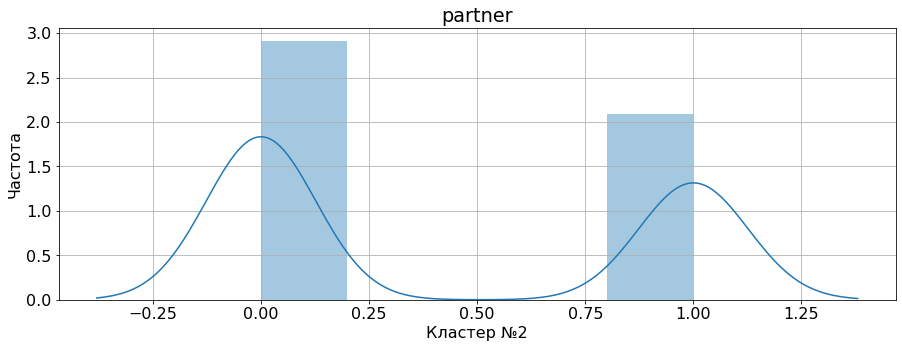

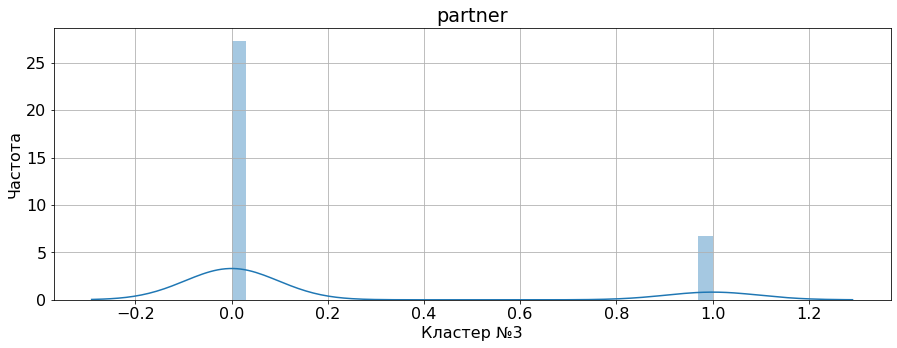

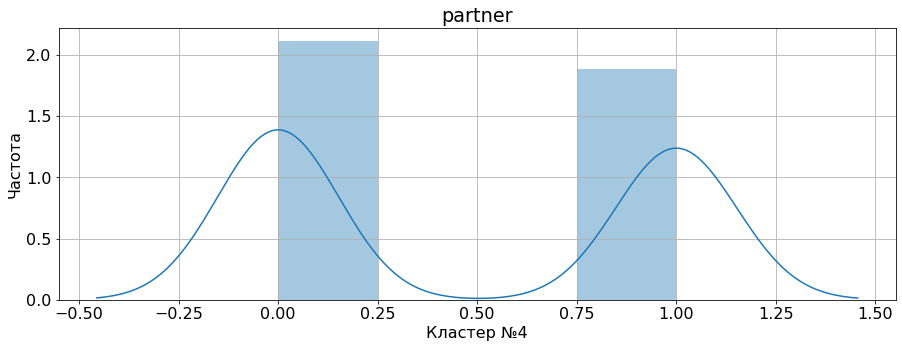

Признак promo_friends


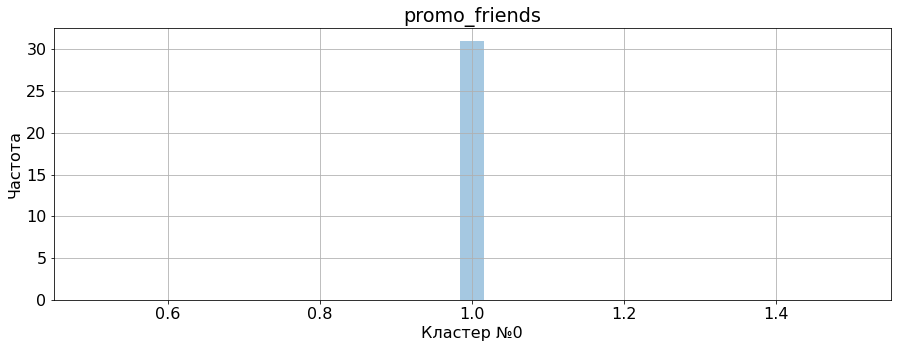

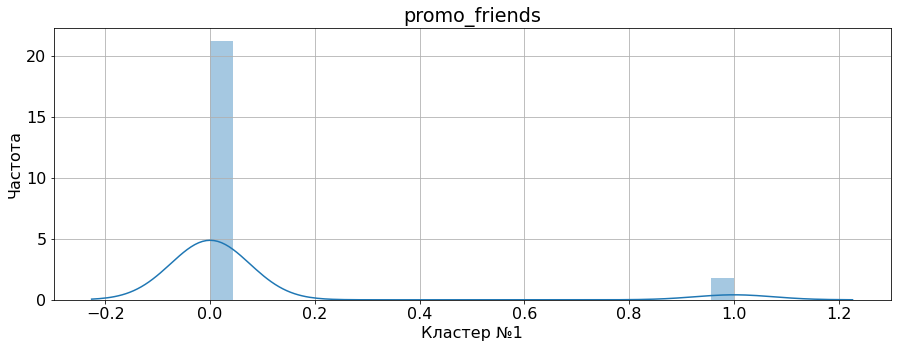

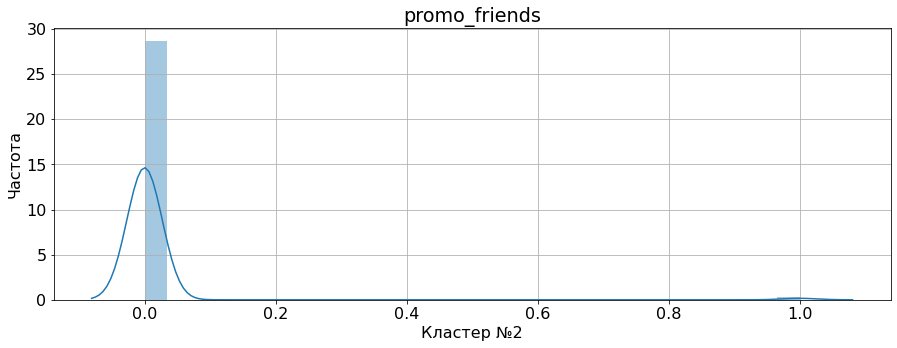

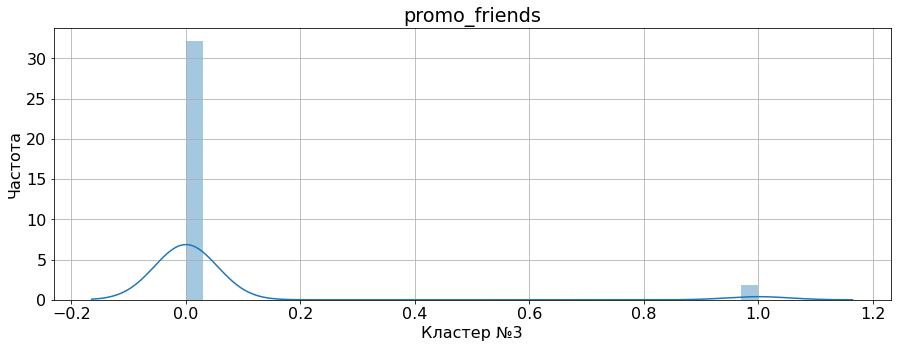

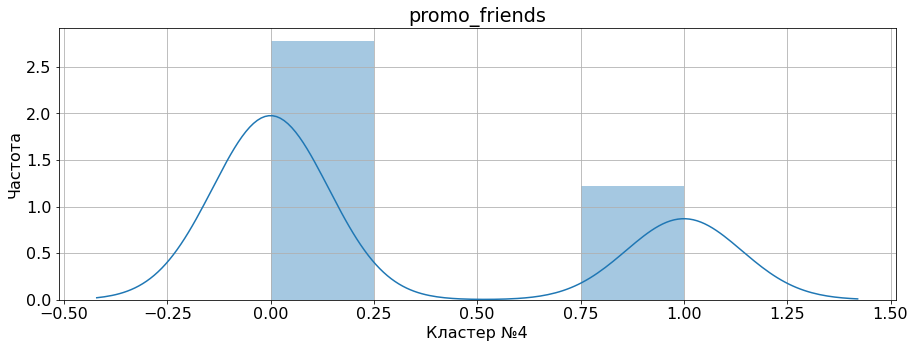

Признак phone


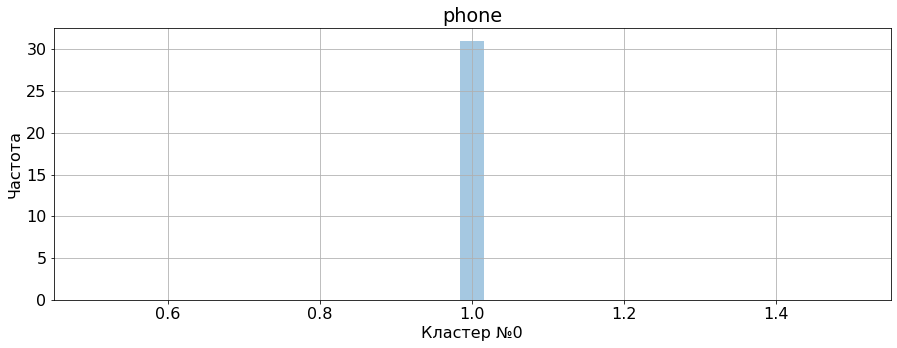

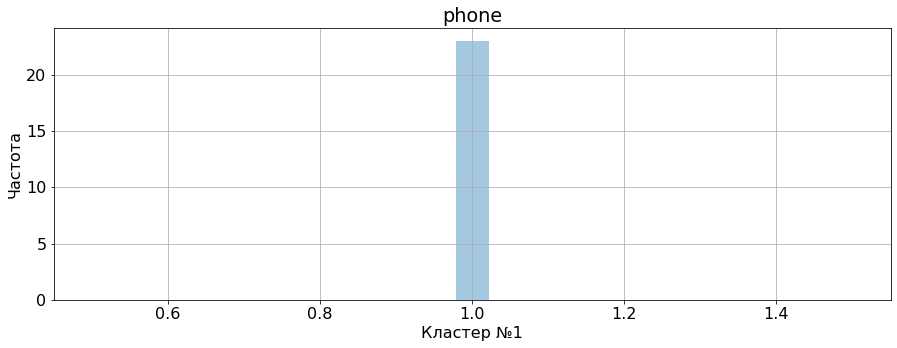

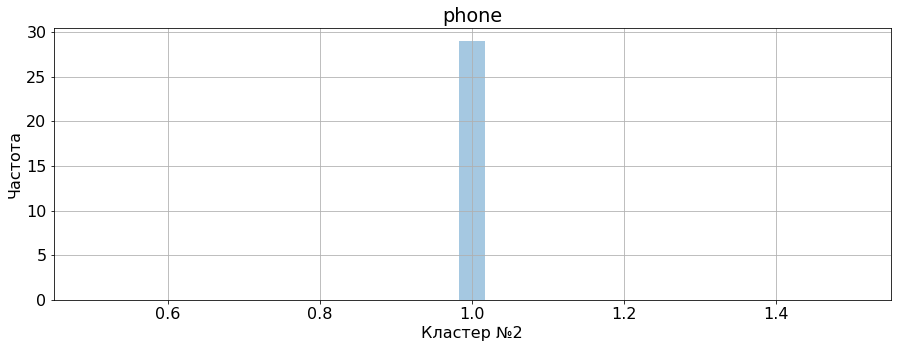

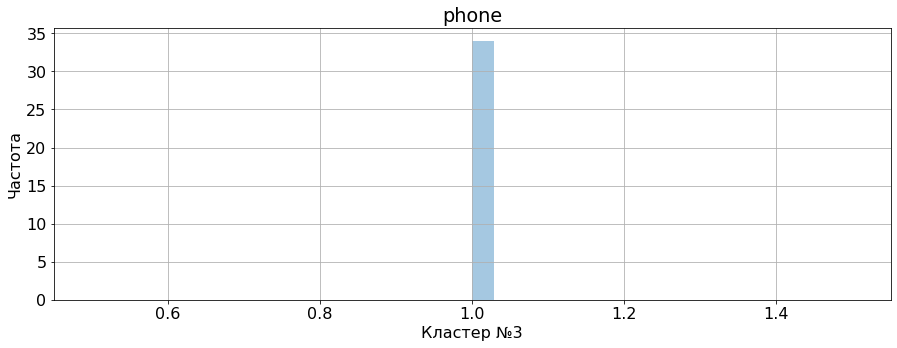

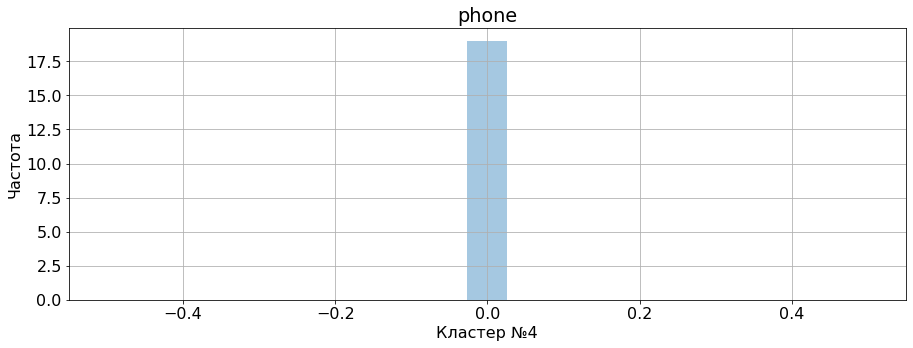

Признак group_visits


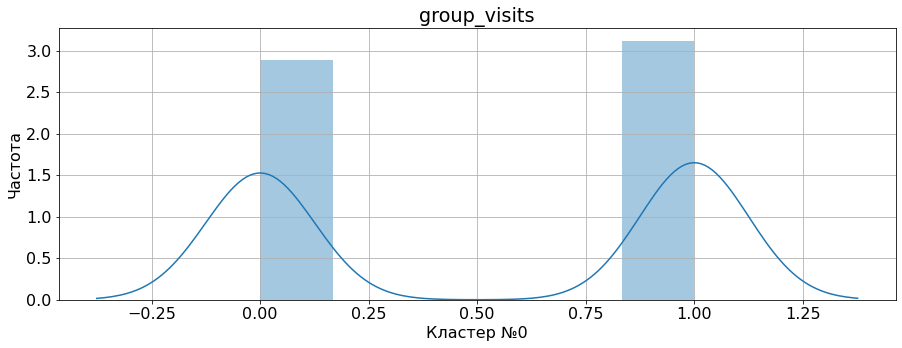

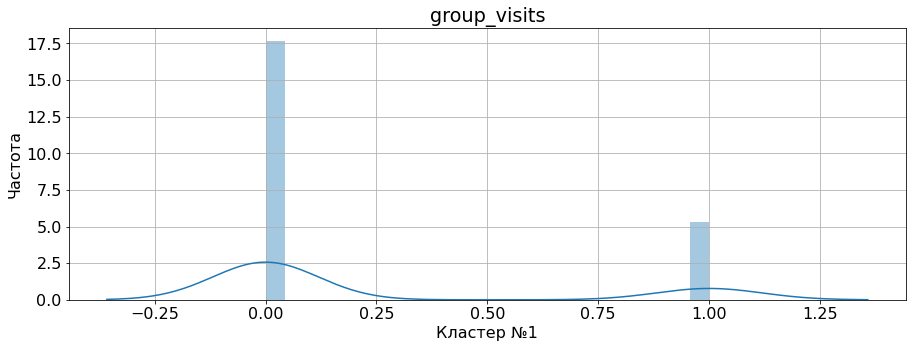

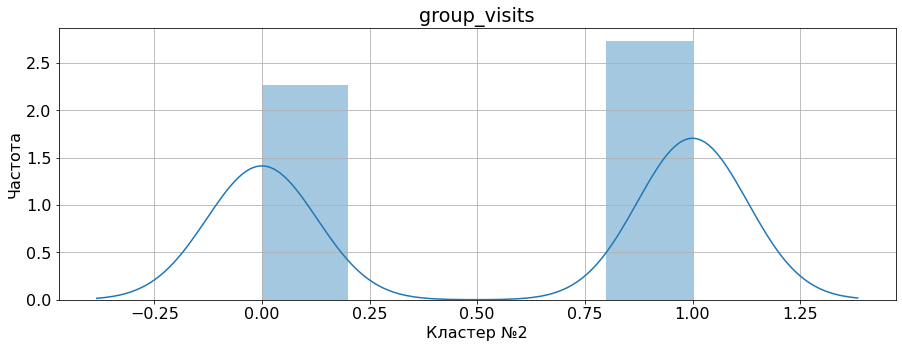

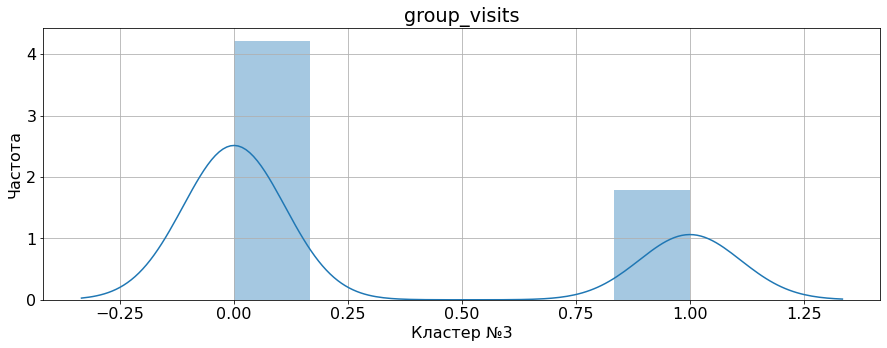

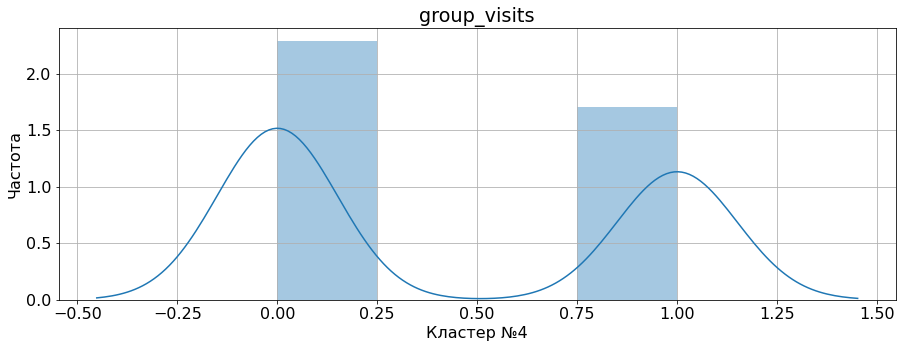

Признак age


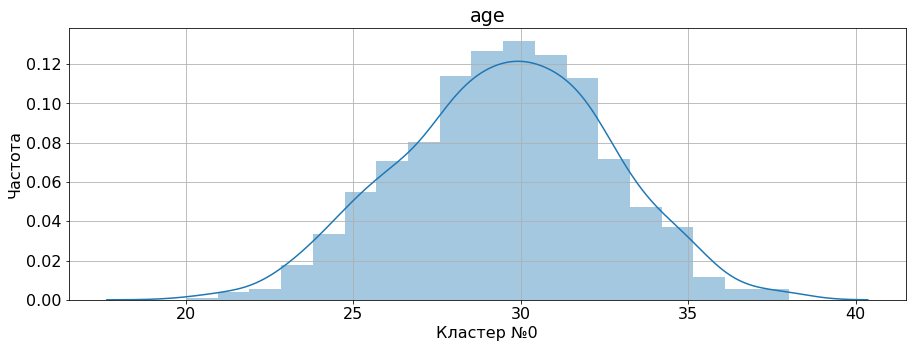

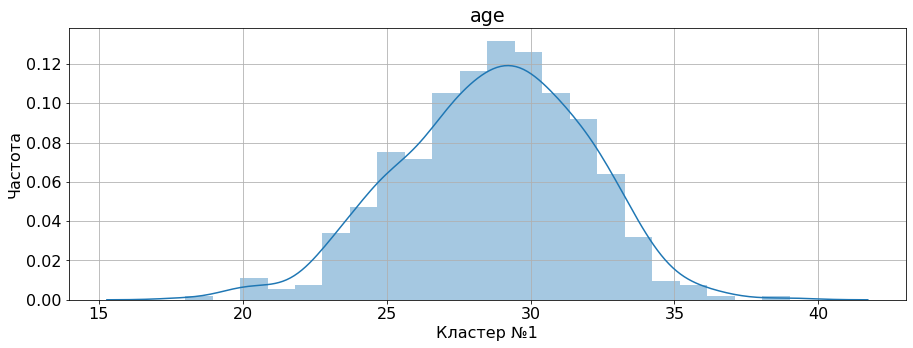

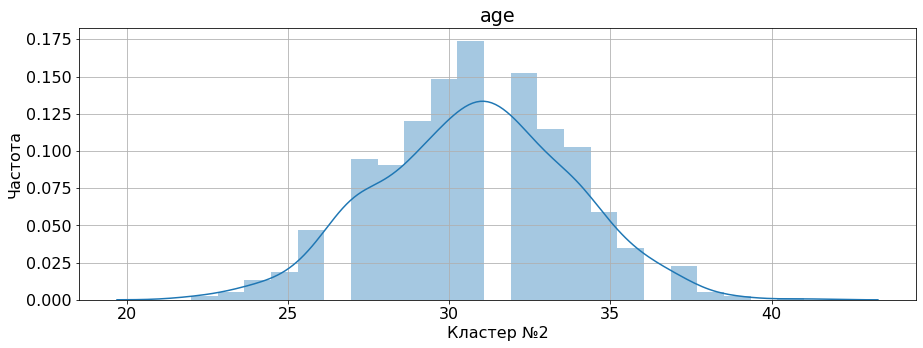

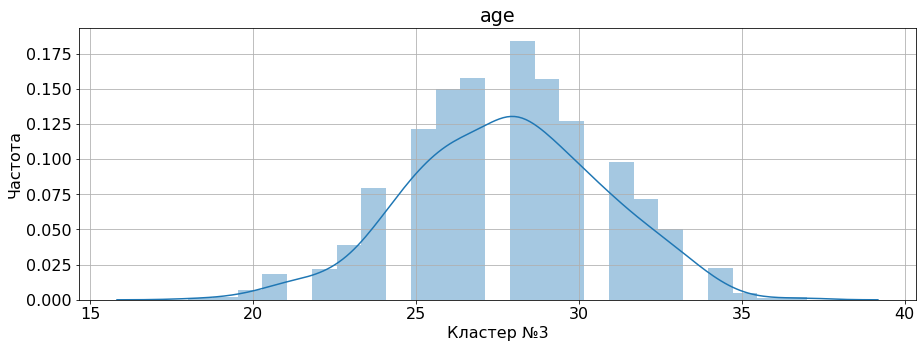

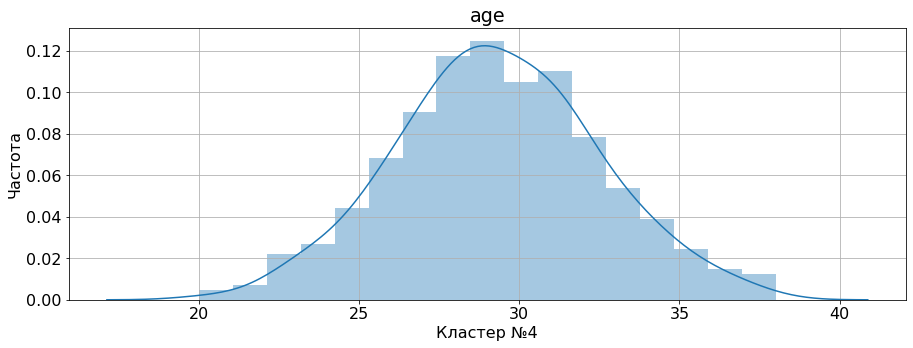

Признак avg_additional_charges_total


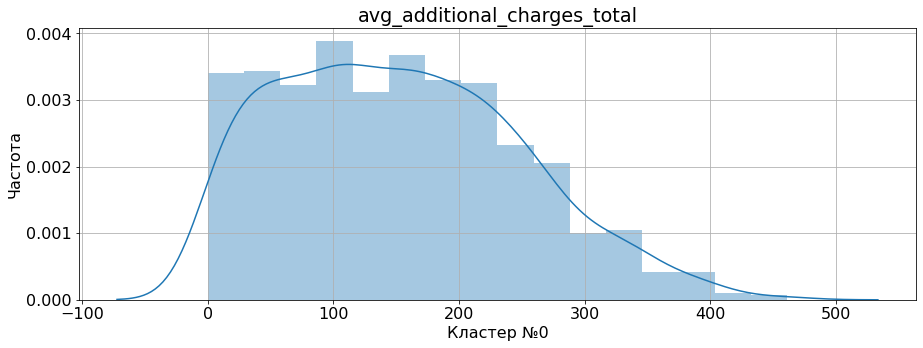

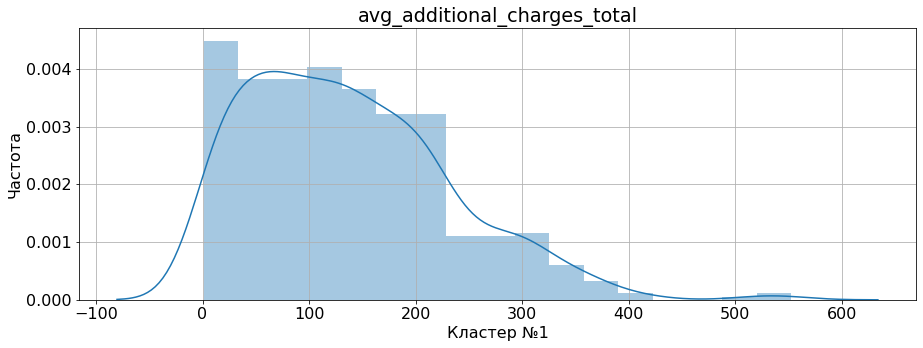

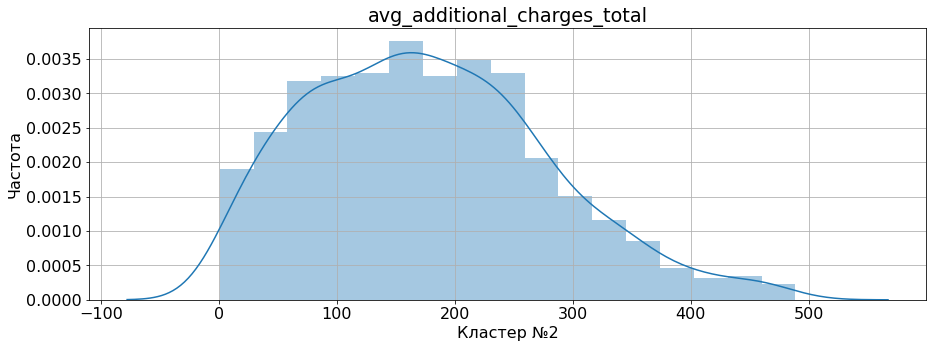

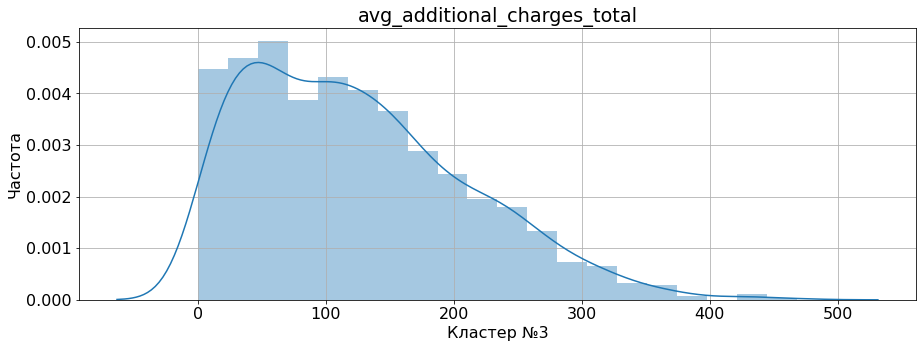

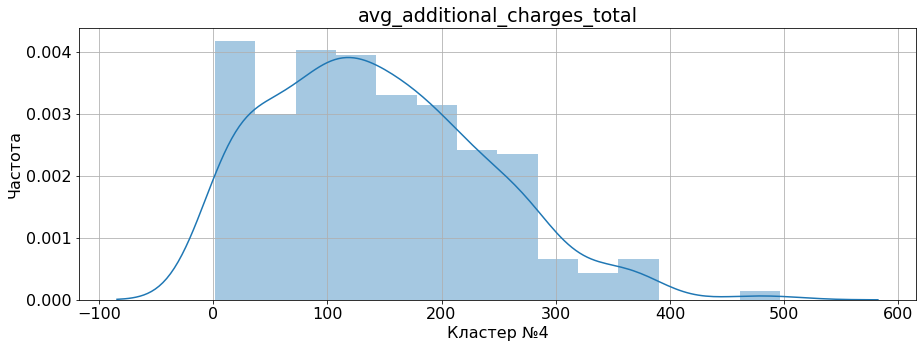

Признак month_to_end_contract


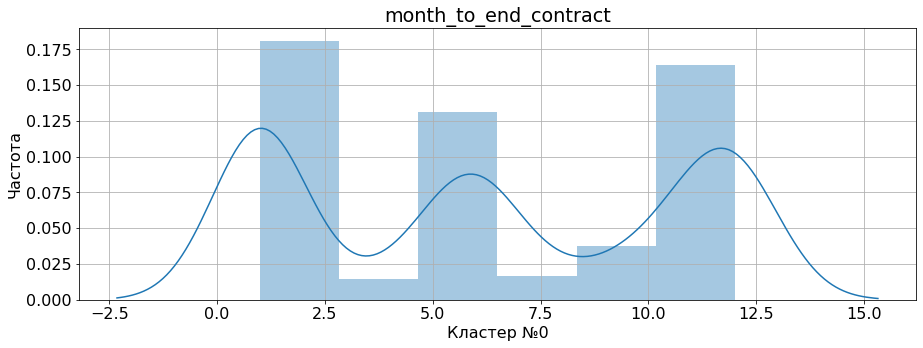

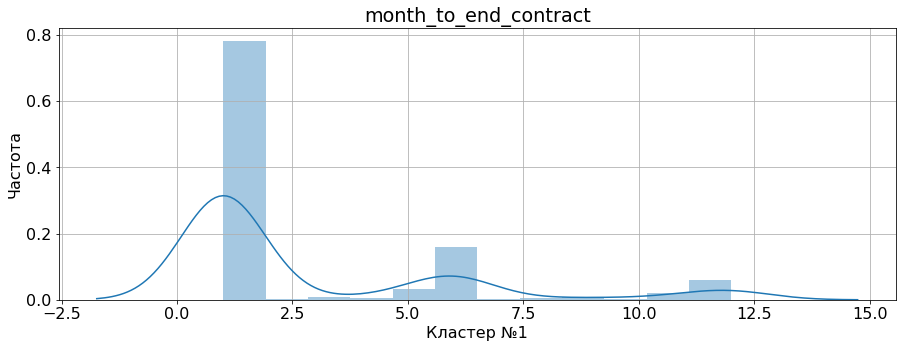

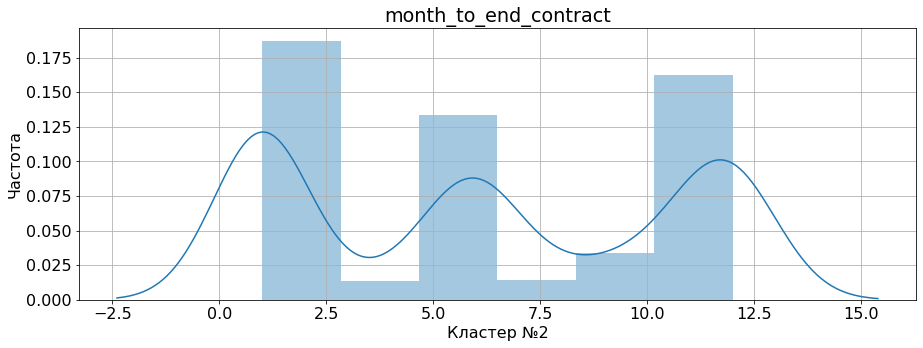

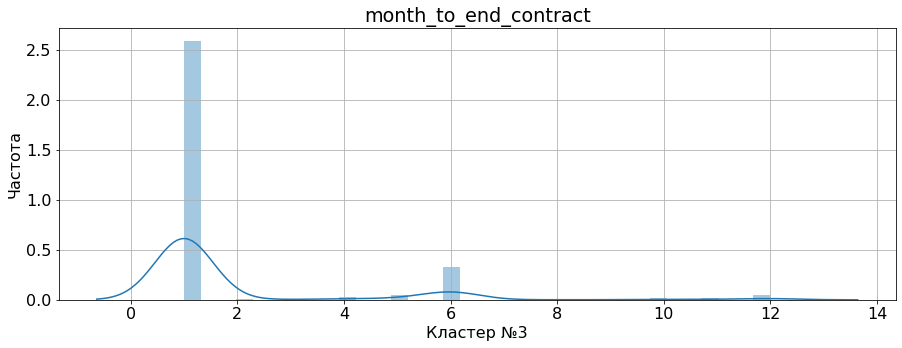

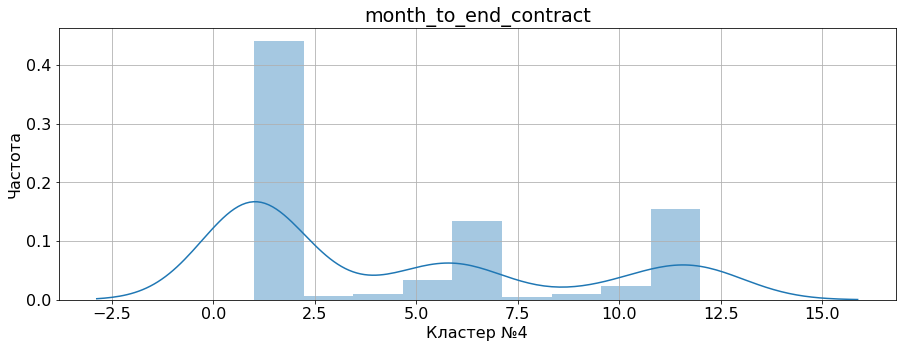

Признак lifetime


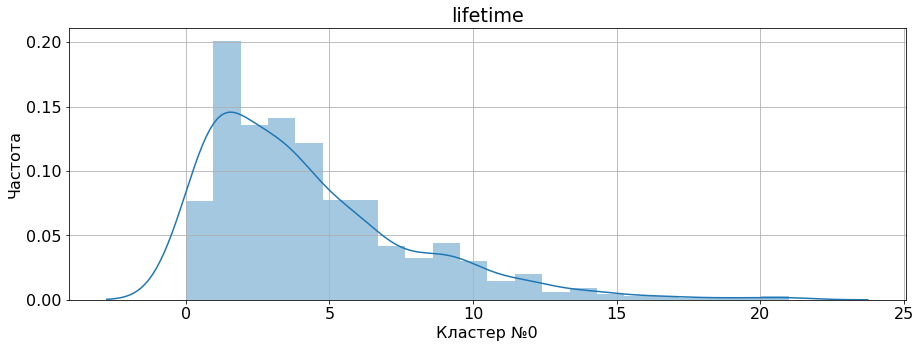

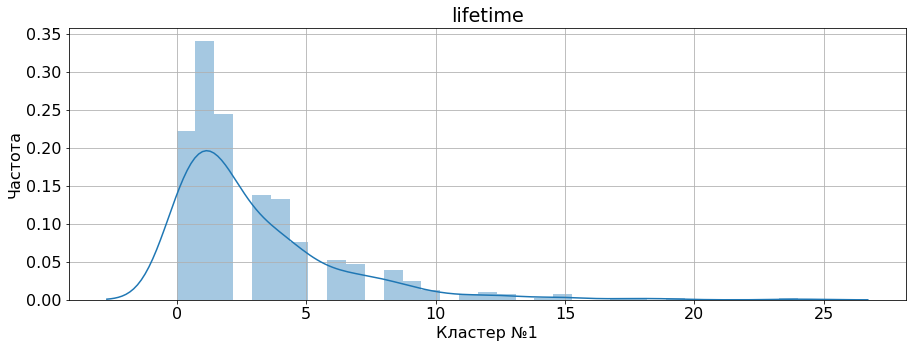

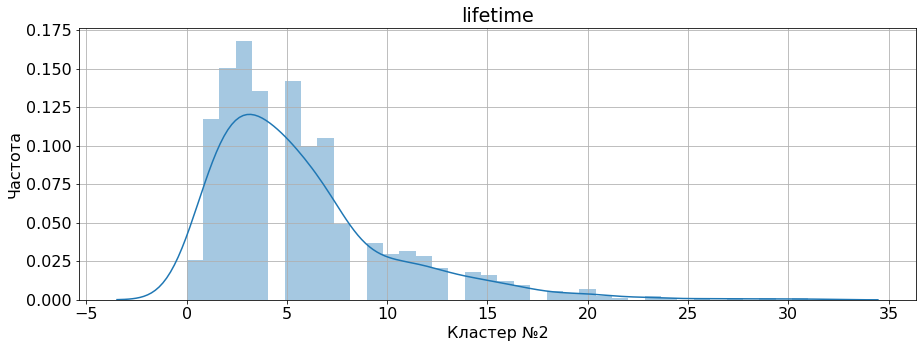

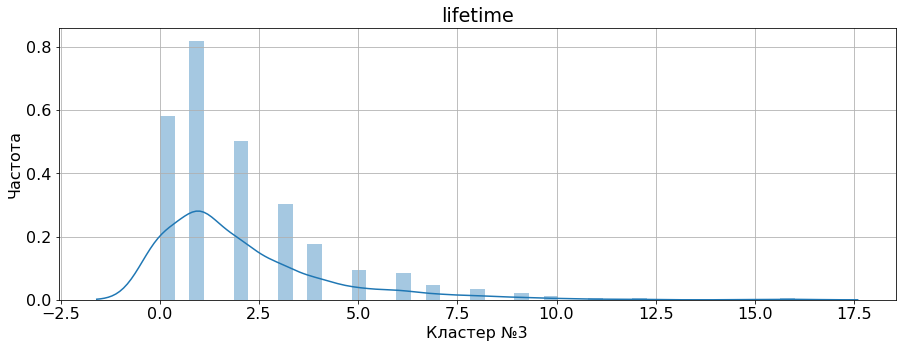

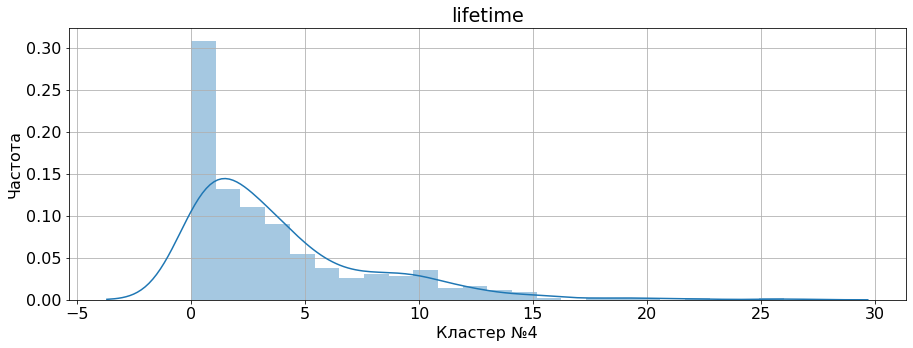

Признак avg_class_frequency_total


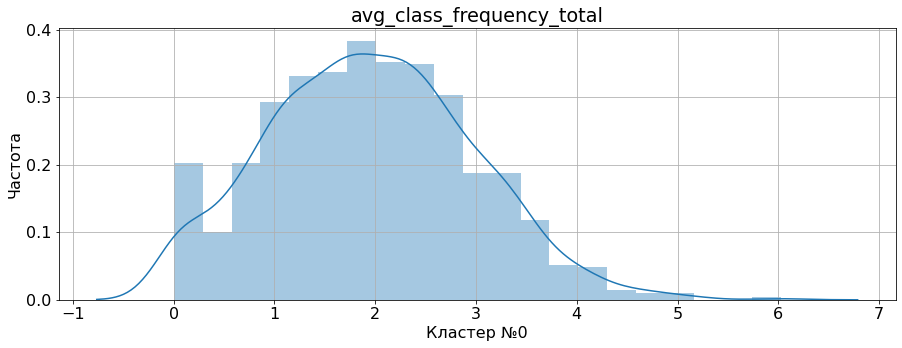

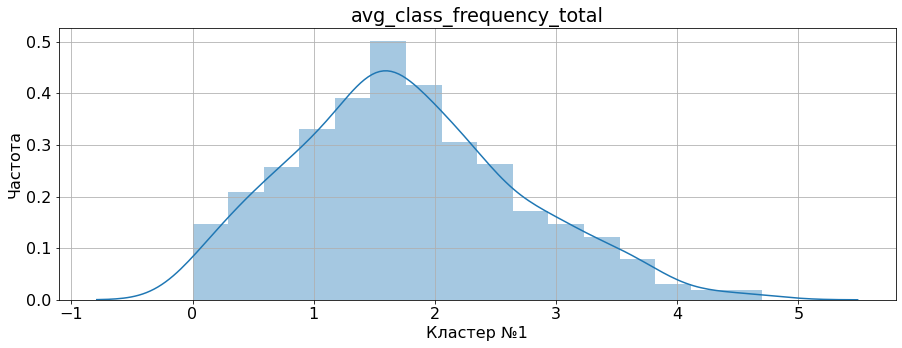

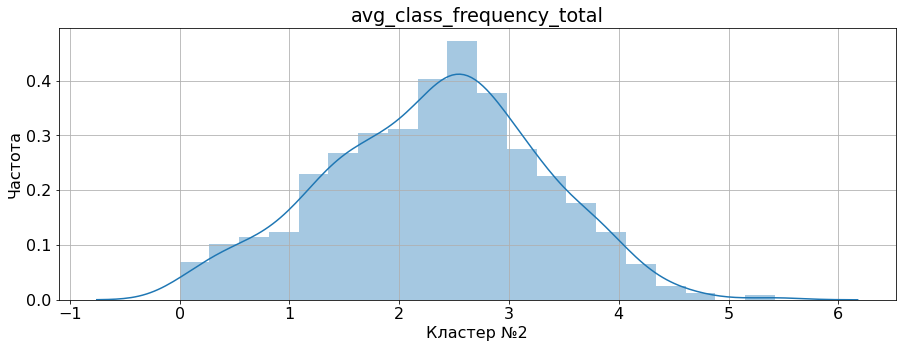

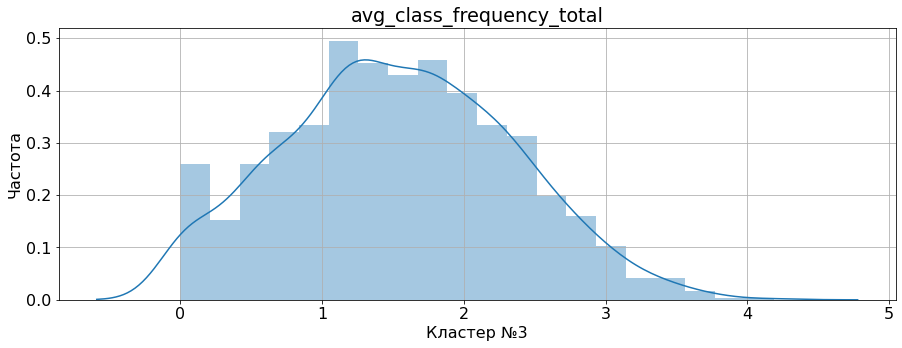

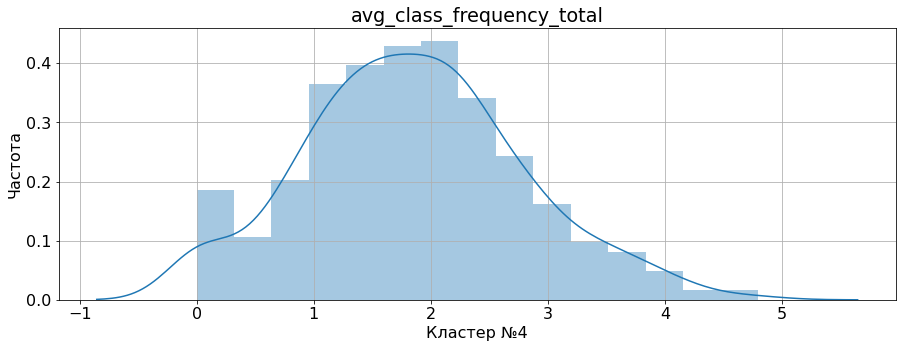

Признак churn


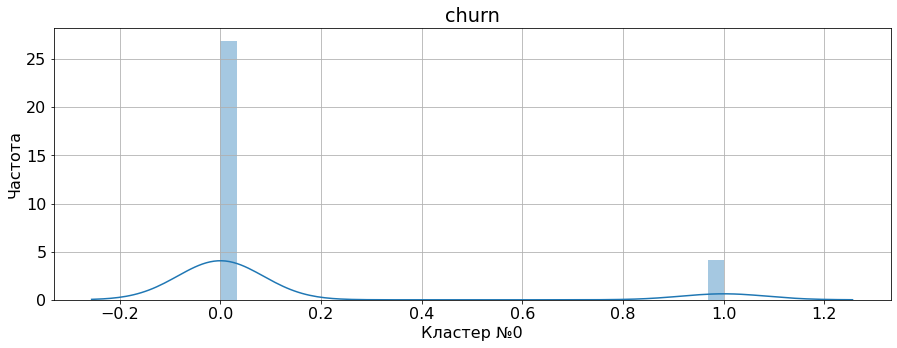

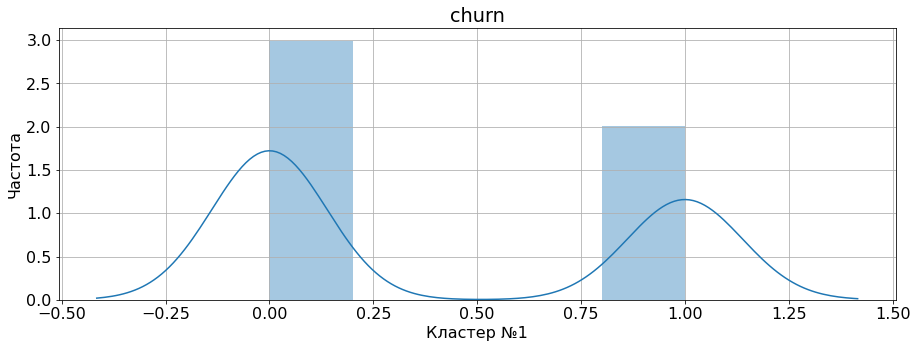

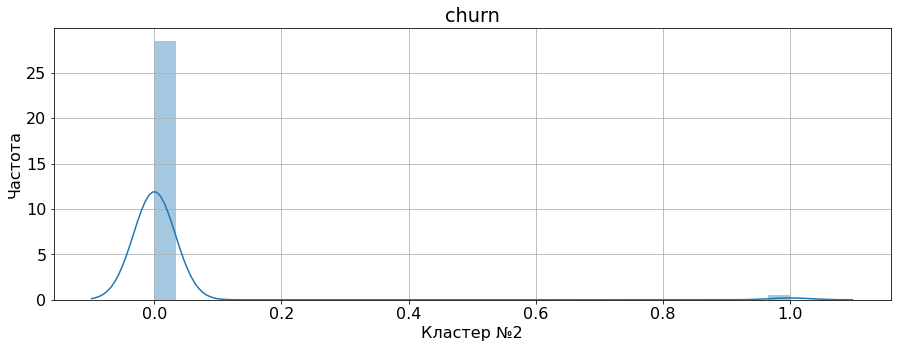

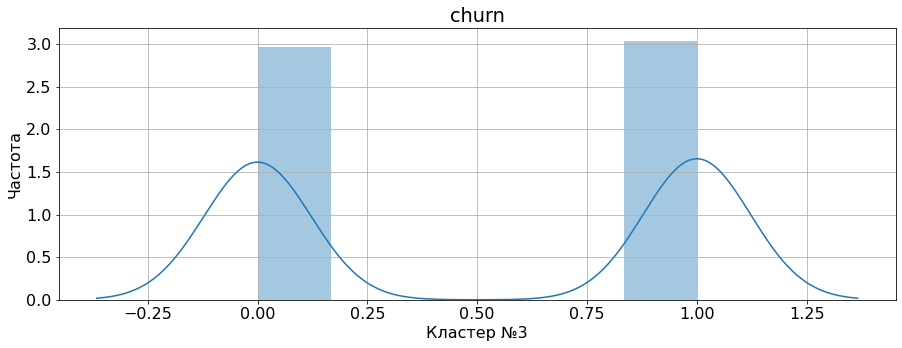

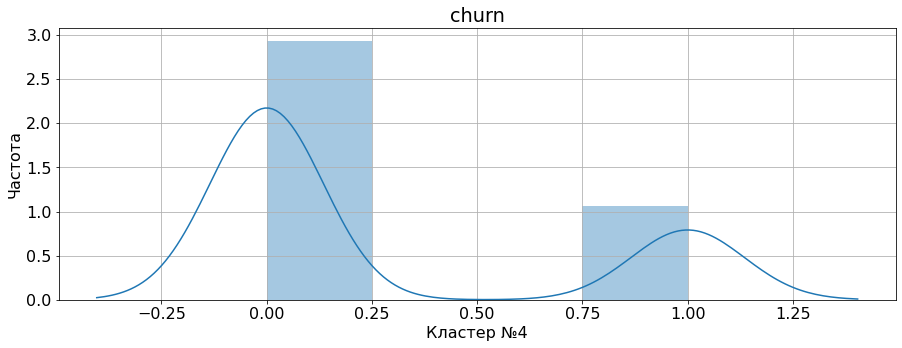

In [41]:
create_cluster_hist(df, columns)

Благодаря построенным гистограммам распределения признаков для кластеров можно заметить, что:
- Распределение мужчин и женщин во всех кластерах примерно одинаковое.
- Только в Кластере №1 клиенты проживают далеко от фитнес-центра.
- В Кластере №0 почти все являются партнерами клуба. В Кластере №3 партнеры в меньшинстве. В остальных кластерах примерно поровну.
- В кластерах №1,2,3 практически нет пришедших по промо. В Кластере №0 все пришли по приглашению знакомых.
- Телефоны не указаны у всех клиентов только в Кластере №4.
- В кластерах №0, 2, 4 примерно поровну посещают групповые занятия. В кластерах 1 и 3 примерно четверть посещает групповые занятия.
- Возраст распределен нормально во всех кластерах.
- В Кластере №0 и 2 чуть больше трат на доп.услуги, чем в остальных кластерах.
- Выделяется кластер №3, в нем больше всего клиентов с минимальным временем до конца действия абонемента.
- Выделяется Кластер №4, в нем большая часть клиентов посещает фитнес-центр около месяца.
- В кластерах 1,3,4 в среднем посещают фитнес 1-2 раза в неделю. В кластере №2 - 2-3 раза в неделю.
- В Кластерах №0 и 2 собраны клиенты с меньшим оттоком, в Кластерах №1 и 3 средний отток больше. 

#### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [42]:
df.groupby('cluster_km')['churn'].agg('sum') / df.groupby('cluster_km')['churn'].size()

cluster_km
0    0.132867
1    0.402154
2    0.016704
3    0.506045
4    0.266839
Name: churn, dtype: float64

In [43]:
df.groupby('cluster_km')['churn'].agg('mean')

cluster_km
0    0.132867
1    0.402154
2    0.016704
3    0.506045
4    0.266839
Name: churn, dtype: float64

К оттоку более склонны Кластер №1 и №3. Менее склонны №0, 2 и 4.

Можно дать названия кластерам, например:
- Кластер 0: "Соседи"
- Кластер 1: "С другого района"
- Кластер 2: "Постоянные клиенты"
- Кластер 3: "Новички"
- Кластер 4: "Середняки-анонимы"

### Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами
Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.


Основные выводы на основании проведенного анализа:

По всей выборке: 
- Распределение мужчин и женщин, среди тех кто ушел и остался, одинаковое.
- Ожидаемо, что среди тех кто перестал посещать спорт-зал проживающих рядом с фитнесом, меньше чем среди продолжающи посещать (76% против 87%).
- Интересно, что клиенты пришедшие по партнерской программе или по промо-коду друзей чаще продолжают заниматься (35%/18% ушедших против 53%/35% против оставшихся).
- Наличие контактного телефона одинаковое среди обеих групп (90%).
- Среди тех кто продолжает заниматься - средняя длительность текущего действующего абонемента - 5,7 месяцев. Среди оттока - дительность абонемента 1,7 месяца.
- Групповые занятия реже посещают те кто ушел (27%), среди оставшихся почти половина посещает групповые заниятия.
- Средний возраст попавших в отток - 27 лет, в среди занимающихся - 30 лет.
- В среднем на доп.услуги больше тратят не попавшие в отток, 158 у.е. против 115 у.е.
- Срок до окончания текущего действующего абонемента больше у не попавших в отток - 5,3 месяца, против 1,6 месяца в оттоке.
- "Старожилов" фитнес-центра больше среди продолжающих заниматься, 4,7 месяца. - Уходят чаще прозанимавшись около месяца.
- Средняя частота посещений среди тех кто остался - 2 раза в неделю, а среди тех кто в оттоке - 1 раз в неделю.

Выводы для ушедших в отток:

- Мужчины и женщины распределены примерно поровну.
- У подавляющего большинства ушедших фитнес находился рядом с домом или работой (80%).
- Только лишь 30% попавших в отток пришли по партнерской программе.
- По промо-коду от знакомых пришла меньшая часть оттока, около 20%.
- Практически у всех указан контактный телефон.
- Среди оттока длительность текущего абонемента у большинства - 1 месяц.
- Ушедшие клиенты значительно реже посещали групповые занятия.
- Возраст распределен нормально, без выбросов.
- Распределение дополнительных трат смещено влево.
- У большинства (90%) переставших посещать финтес оставался 1 месяц до конца абонемента.
- Большинства ушедших первый раз обратились в фитнес меньше месяца назад.
- Распределение признака "средняя частота посещений в неделю за все время с начала действия абонемента" - нормальное. Но есть выброс слева, достаточно большое количество вообще не посещало фитнес.
- Распределение признака "средняя частота посещений в неделю за предыдущий месяц" тоже нормальное, с таким же выбросом.

Выводы на основании графиков не попавших в отток:

- Мужчины и женщины распределены примерно поровну.
- 90% посещающих фитнес живут или работают рядом.
- Среди продолжающих посещать фитнес чуть больше половины пришли по партнерской программе.
- По промо-коду от знакомых пришла одна третья часть посещающих фитнес.
- Практически у всех указан контактный телефон.
- Длительность текущего абонемента у продолжающих ходить в фитнес-центр: 1 месяц, примерно 40%; 6 месяцев, примерно 25%, 12 месяцев, примерно 30% .
- Групповые занятия посещают примерно 45% от всех кто ходит на фитнес.
- Возраст распределен нормально, без выбросов.
- Распределение дополнительных трат смещено влево.
- Срок до окончания текущего действующего абонемента у продолжающих посещать фитнес - 1 месяц - 43%, 6 месяцев - 18%, 12 месяцев - 16%.
- Большинства продолжающих посещать фитнес ходят туда от 1 до 4 месяцев.
- Распределение признака "средняя частота посещений в неделю за все время с начала действия абонемента" - нормальное. Но есть выброс слева, достаточно большое количество вообще не посещало фитнес. Многие ходят от 1 до 3 раз в неделю.
- Распределение признака "средняя частота посещений в неделю за предыдущий месяц" тоже нормальное, с таким же выбросом. Многие ходят от 1 до 3 раз в неделю.

На основании выделенных кластеров можно сделать вывод, что новички и живущие далеко более склонны к оттоку, так же на отток влияют факт первоначальной записи в рамках акции «приведи друга», факт посещения групповых занятий и время с момента первого обращения в фитнес-центр. 

Резюмируя можно кратко описать основные выводы:
- Живующие далеко более склонны к оттоку.
- Приглашенные по промо-акции или клиенты от партнеров менее склонны к оттоку.
- Посещающие групповые занятия менее склонны к оттоку.
- Недавно начавшие посещать более склонны к оттоку.


####  Рекомендации для стратегии взаимодействия с клиентами и их удержания.

Важные принципы и примеры их реализации в виде определённых маркетинговых действий:

- Развивать партнерские программы.
- Развивать групповые занятия. Возможно добавить различные секции (йога, кросс-фит, аэробика и т.д.)
- Уделять больше внимания недавно пришедшим (например, бесплатные консультации тренера первый месяц).
- Усилить рекламную кампанию. Например, сделать промо-приглашения более заманчивыми скидка приглашающему и приглашенному.

